# California 2045
---
Plots in the slide deck presented to Nathan on 11/27/2018 have been generated through this notebook.

[Base Case](#base)
1. [Chart](#base_chart)
2. [Stacked plots](#base_stack)
3. [Curtailment plots](#base_curtailment)


[California 2020](#ca2020)
1. [Chart](#ca2020_chart)
2. [Stacked plots](#ca2020_stack)
3. [Curtailment plots](#ca2020_curtailment)


[Congestion 2020](#congestion2020)
1. [Chart](#congestion2020_chart)
2. [Stacked plots](#congestion2020_stack)
3. [Curtailment plots](#comgestion2020_curtailment)


[California 2030](#ca2030)
1. [Chart](#ca2030_chart)
2. [Stacked plots](#ca2030_stack)
3. [Curtailment plots](#ca2030_curtailment)


[Congestion 2030](#congestion2030)
1. [Chart](#congestion2030_chart)
2. [Stacked plots](#congestion2030_stack)
3. [Curtailment plots](#comgestion2030_curtailment)


[West 2020](#west2020)
1. [Chart](#west2020_chart)
2. [Stacked plots](#west2020_stack)
3. [Curtailment plots](#west2020_curtailment)


[West 2030](#west2030)
1. [Chart](#west2030_chart)
2. [Stacked plots](#west2030_stack)
3. [Curtailment plots](#west2030_curtailment)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from postreise.plot.analyze_pg import AnalyzePG as apg
from powersimdata.scenario.scenario import Scenario 

## Base Case
<a id="base"></a>
Multiperiod  
Solar power: SAM  
demand v3  
No multiplier for any of the generator in the grid

In [2]:
s = Scenario('original')

SCENARIO: base | original

--> State
analyze
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="base_chart"></a>

In [3]:
s.print_scenario_info()

--------------------
SCENARIO INFORMATION
--------------------
id: 0
plan: base
name: original
state: analyze
interconnect: Western
base_demand: v3
base_hydro: v1
base_solar: v2
base_wind: v1
change_table: No
start_date: 2016-01-01 00:00:00
end_date: 2016-12-31 23:00:00
interval: 144H
runtime: 9:25
infeasibilities: 34:5_35:5


--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


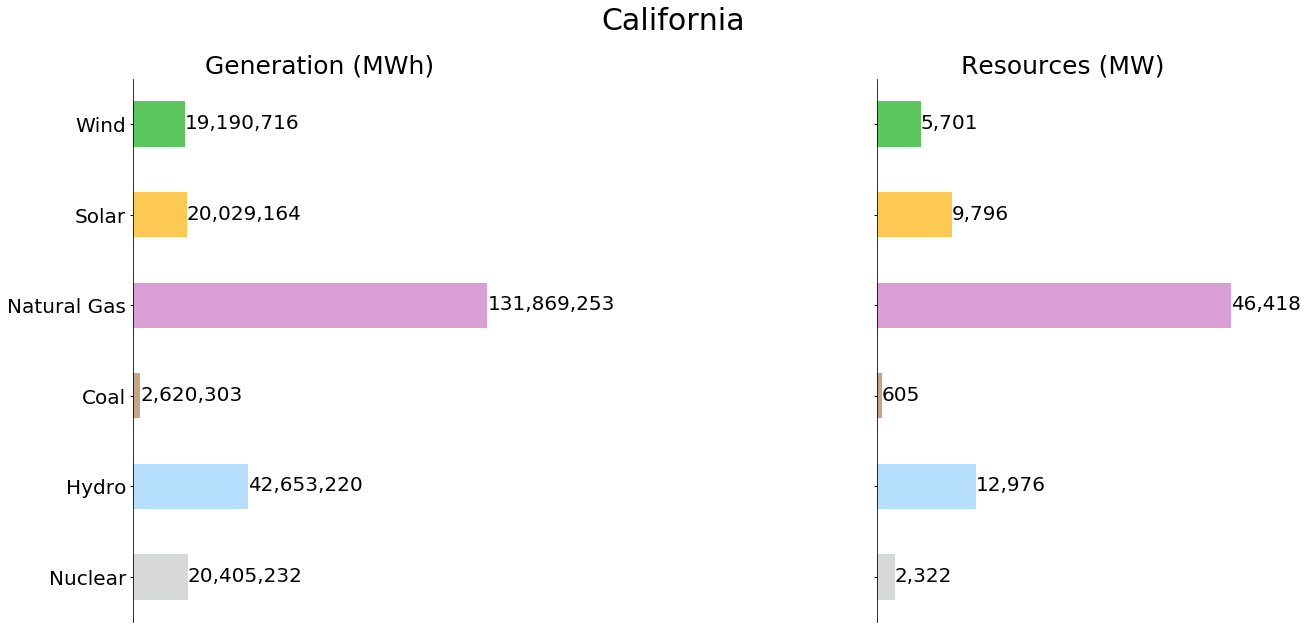

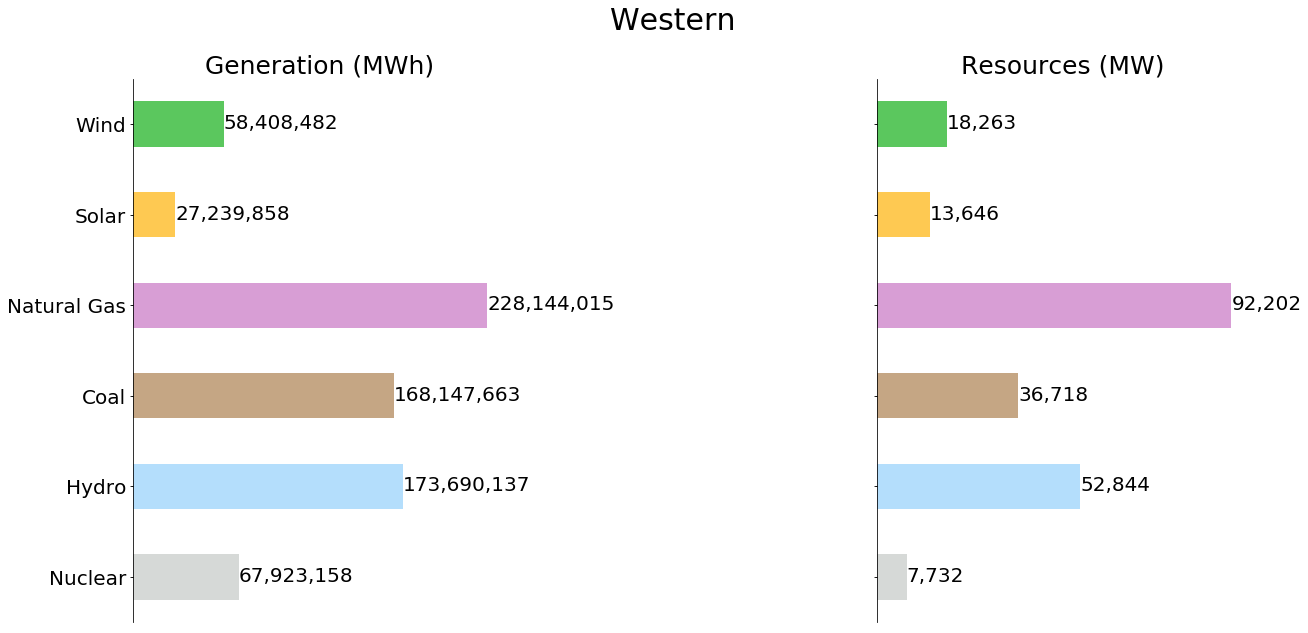

Total Generation in Western Interconnection: 723553316 MWh
Total Capacity in Western Interconnection: 221409 MW


In [4]:
chart = apg(s,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked plots
<a id="base_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


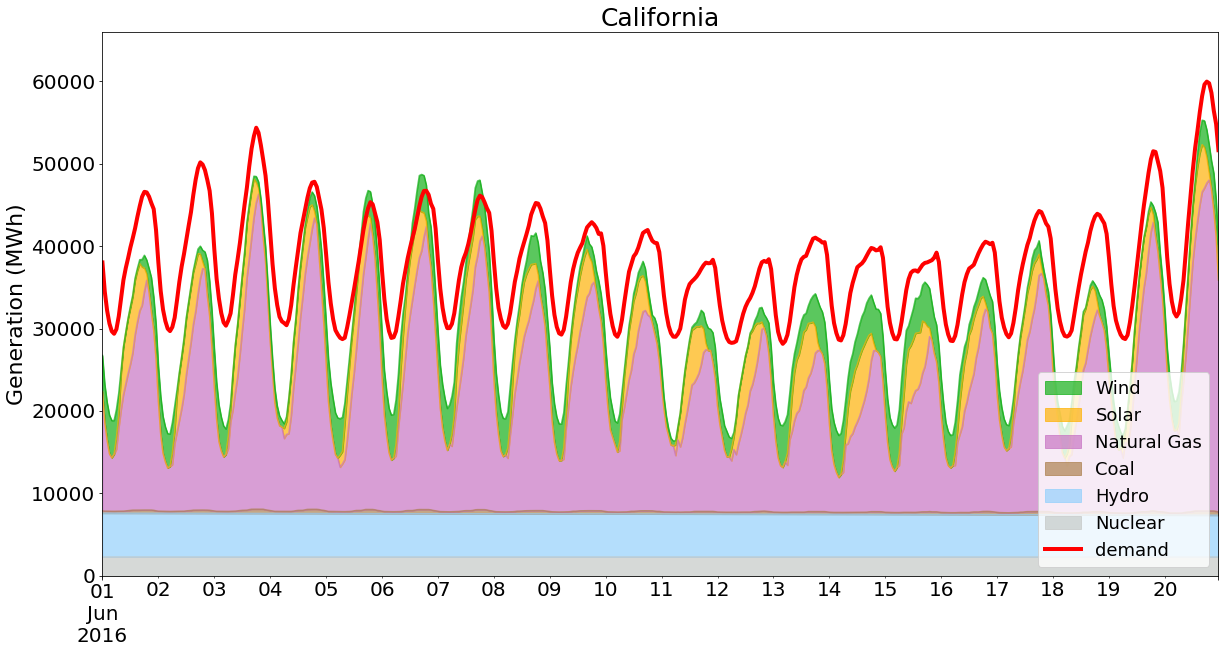

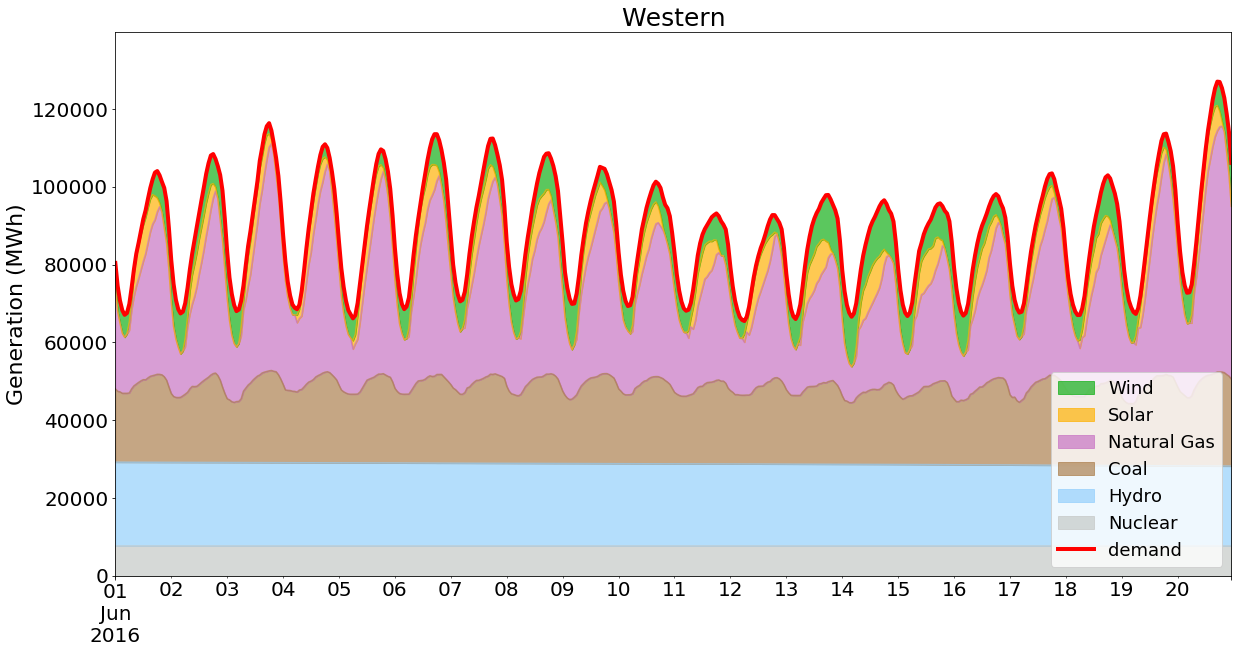

Generation in the Western interconnection in MWh:
84796212.77713582


In [5]:
stack = apg(s,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment plots
<a id="base_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


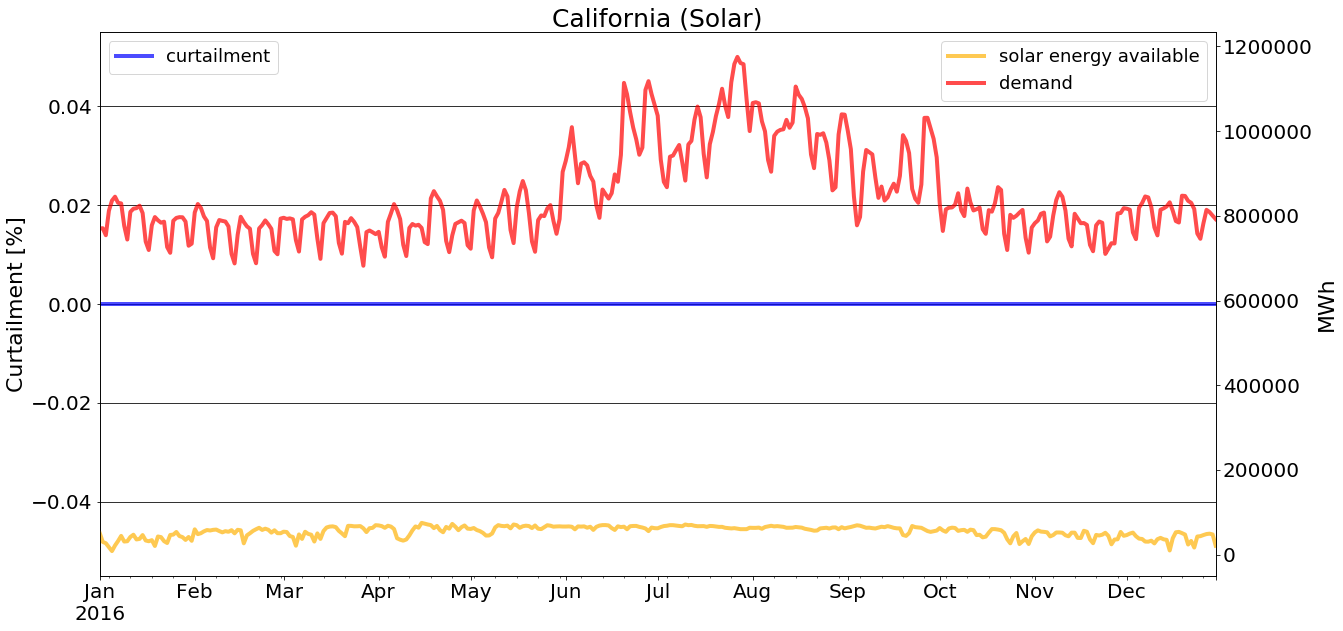

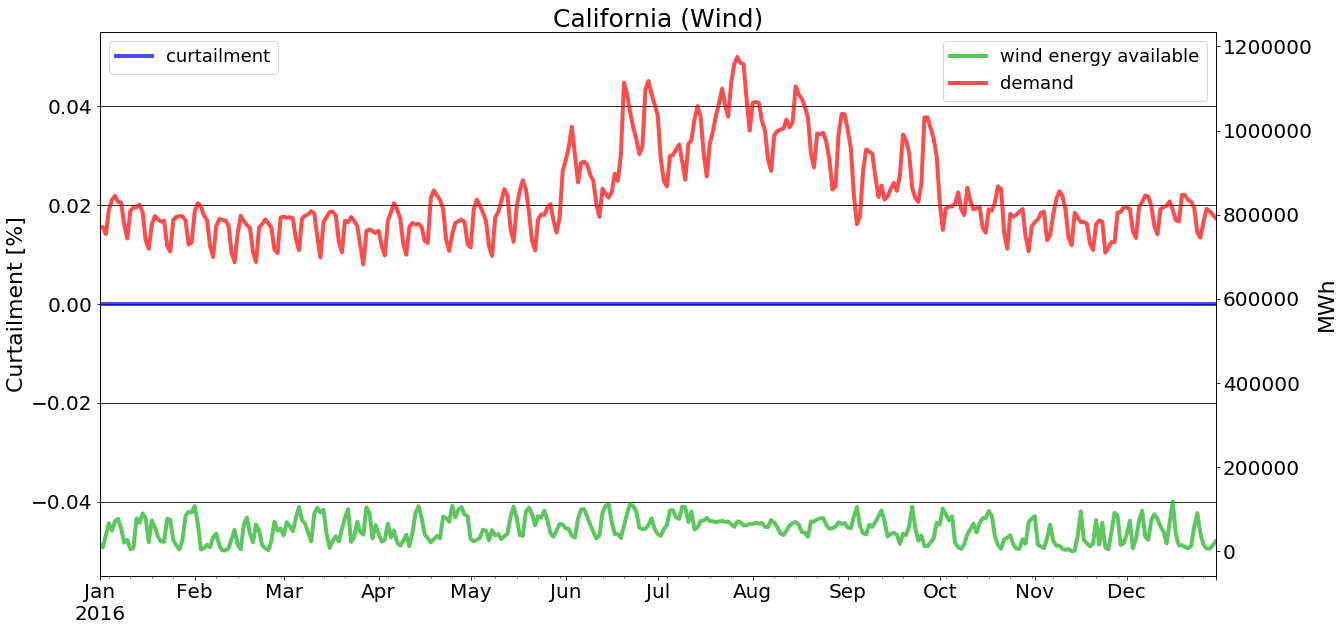

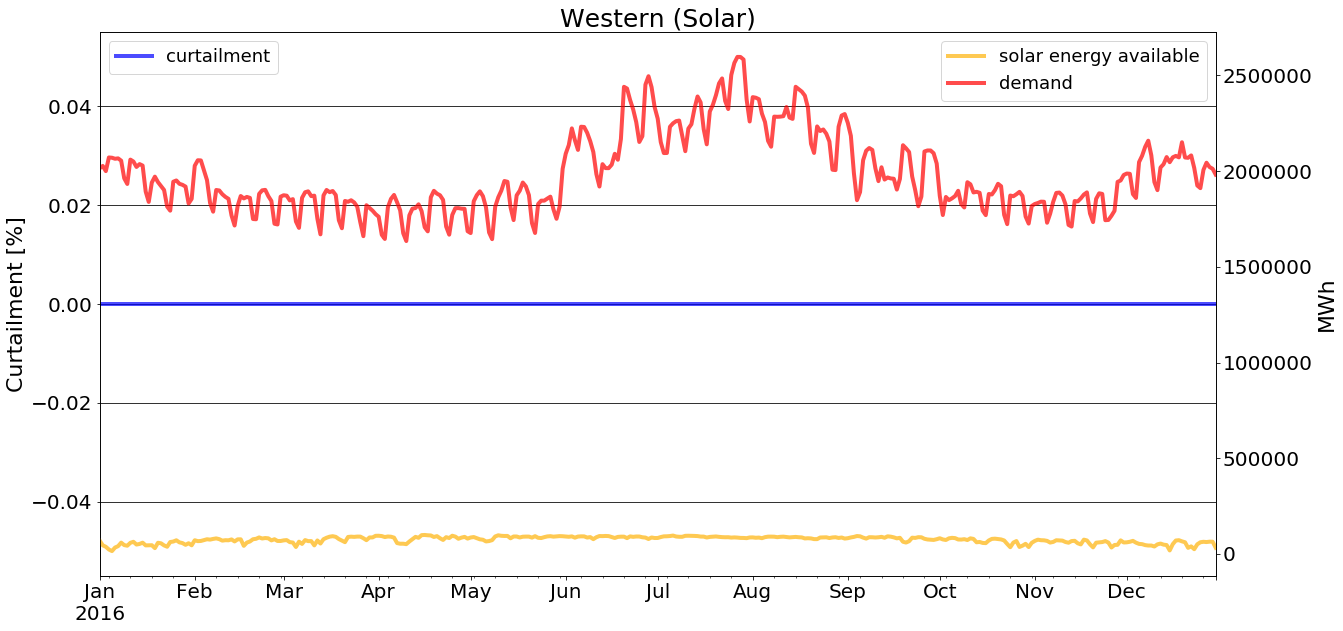

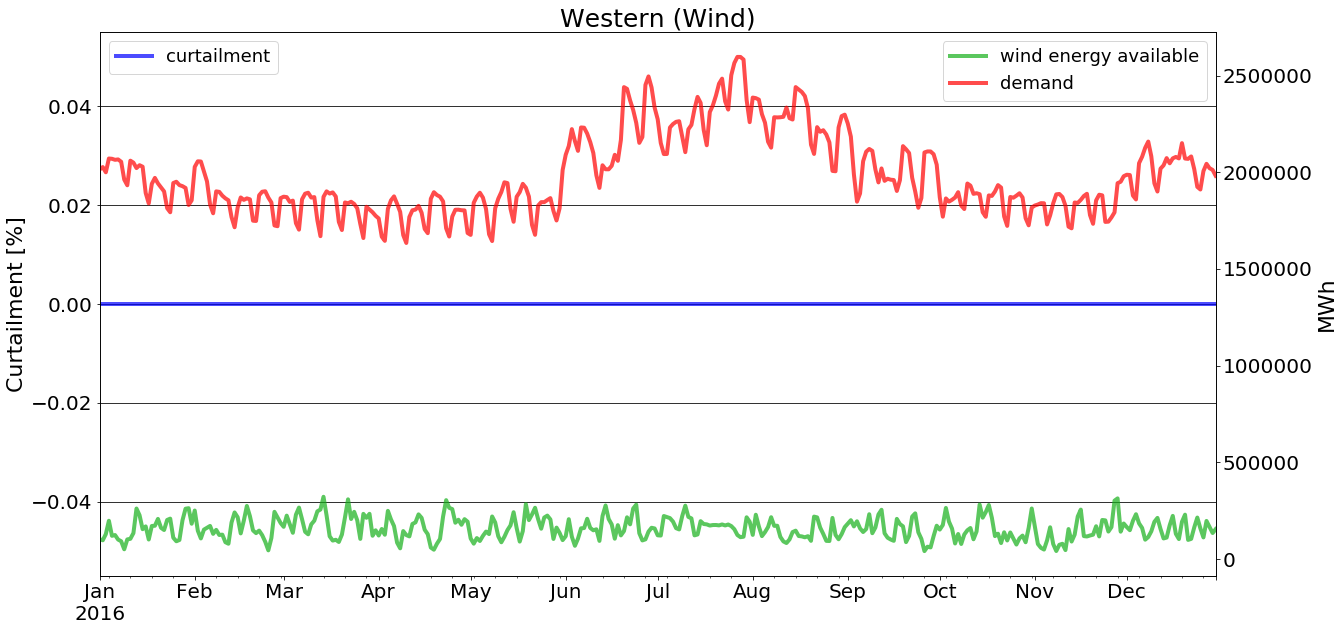

Maximum curtailment for solar generators in the Western Interconnection: 0 %
Maximum curtailment for wind generators in the Western Interconnection: 0 %


In [6]:
curtailment = apg(s,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()
print("Maximum curtailment for solar generators in the Western Interconnection: %d %%" % 
      round(data_curtailment['Western']['solar'].curtailment.max()))
print("Maximum curtailment for wind generators in the Western Interconnection: %d %%" % 
      round(data_curtailment['Western']['wind'].curtailment.max()))

## California 2020
<a id="ca2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 1.52 for solar power output in CA and 1.48 for wind power output in CA.

In [7]:
s2020 = Scenario('ca2020')

SCENARIO: ca2045 | ca2020

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="ca2020_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


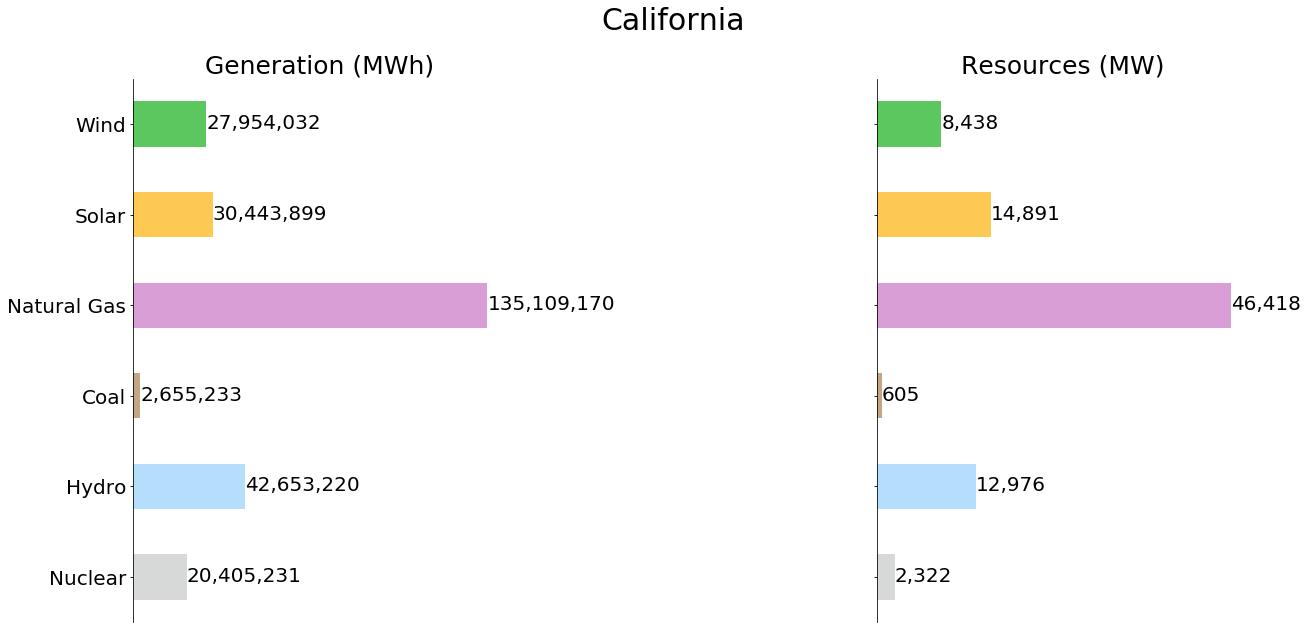

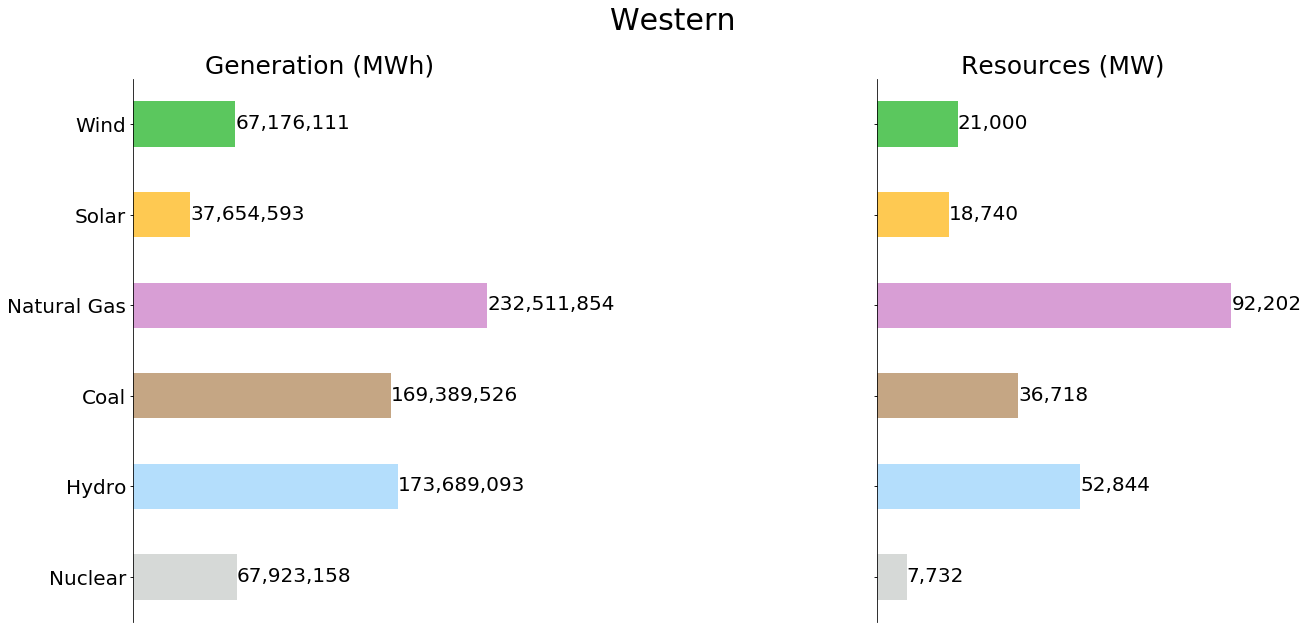

Total Generation in Western Interconnection: 748344338 MWh
Total Capacity in Western Interconnection: 229240 MW


In [8]:
chart = apg(s2020,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="ca2020_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


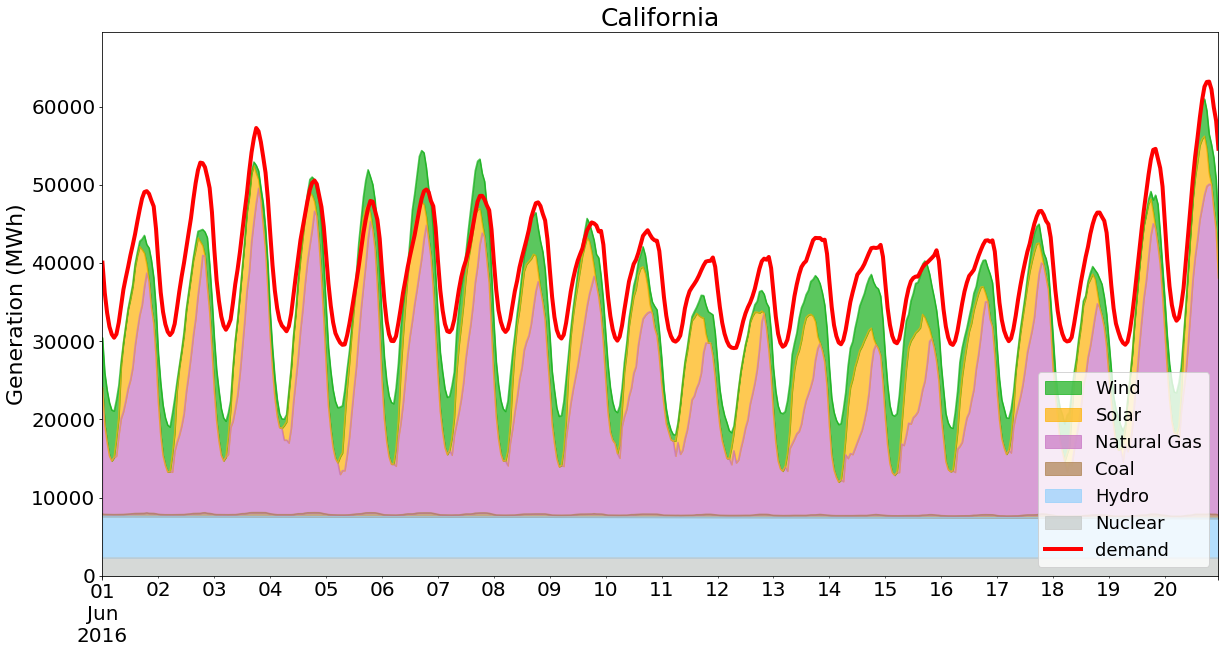

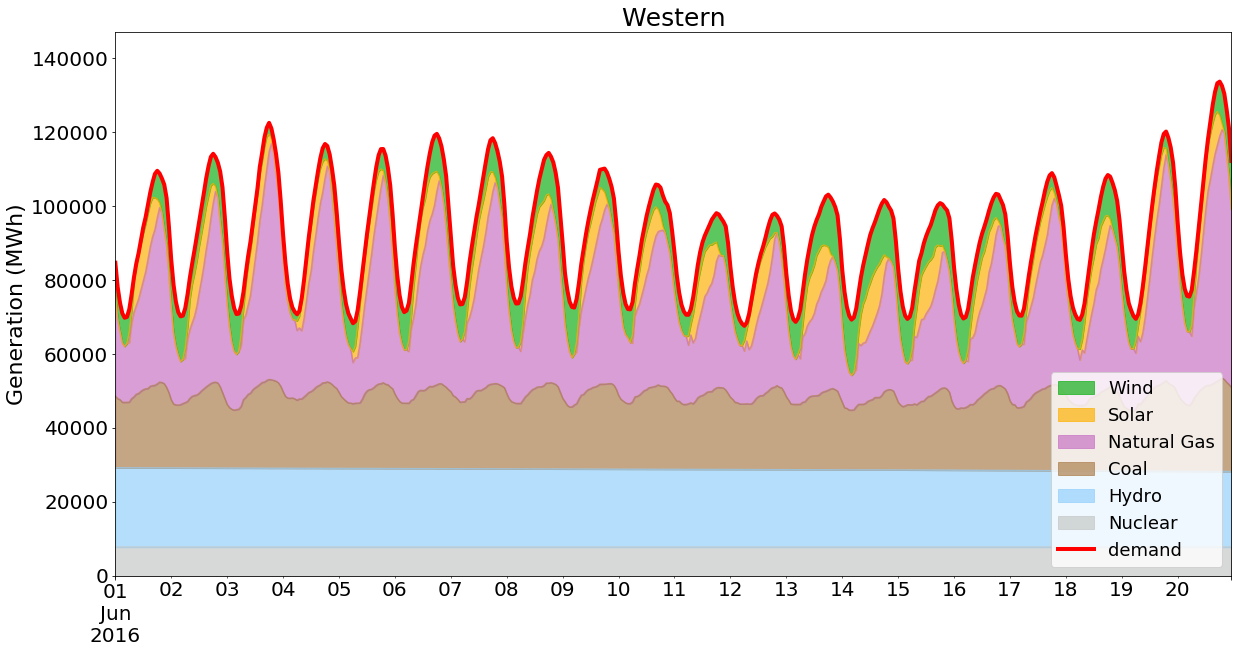

Generation in the Western interconnection in MWh:
88388034.28572135


In [9]:
stack = apg(s2020,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="ca2020_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


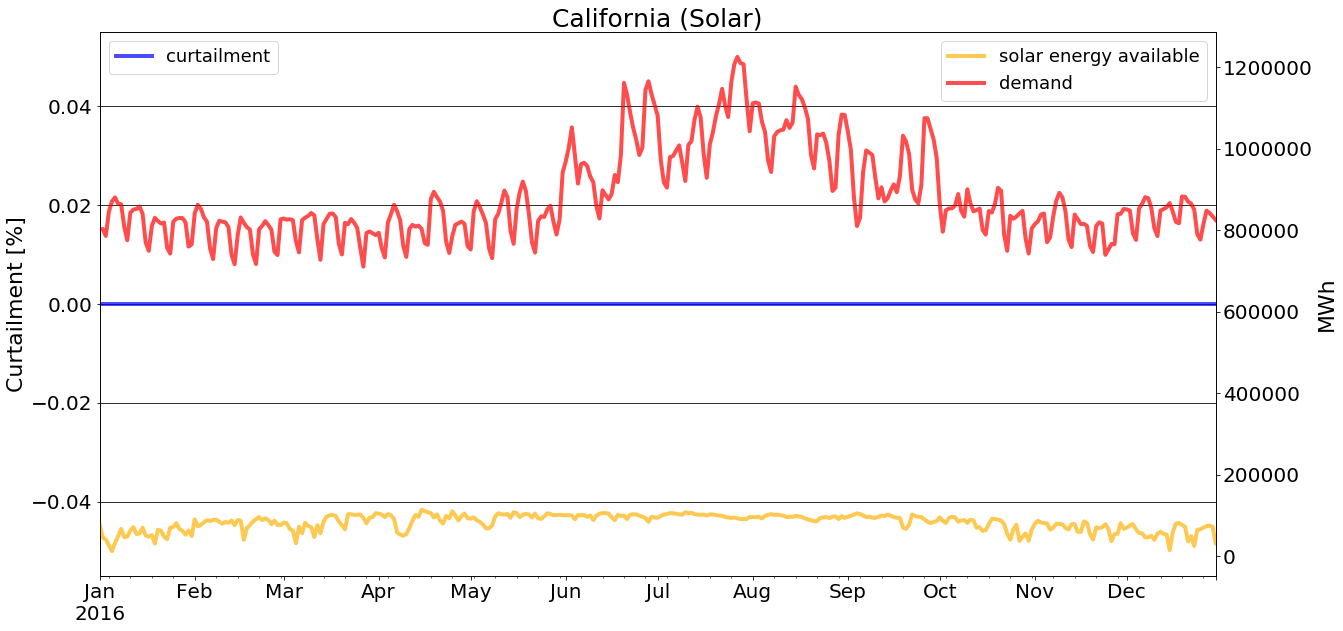

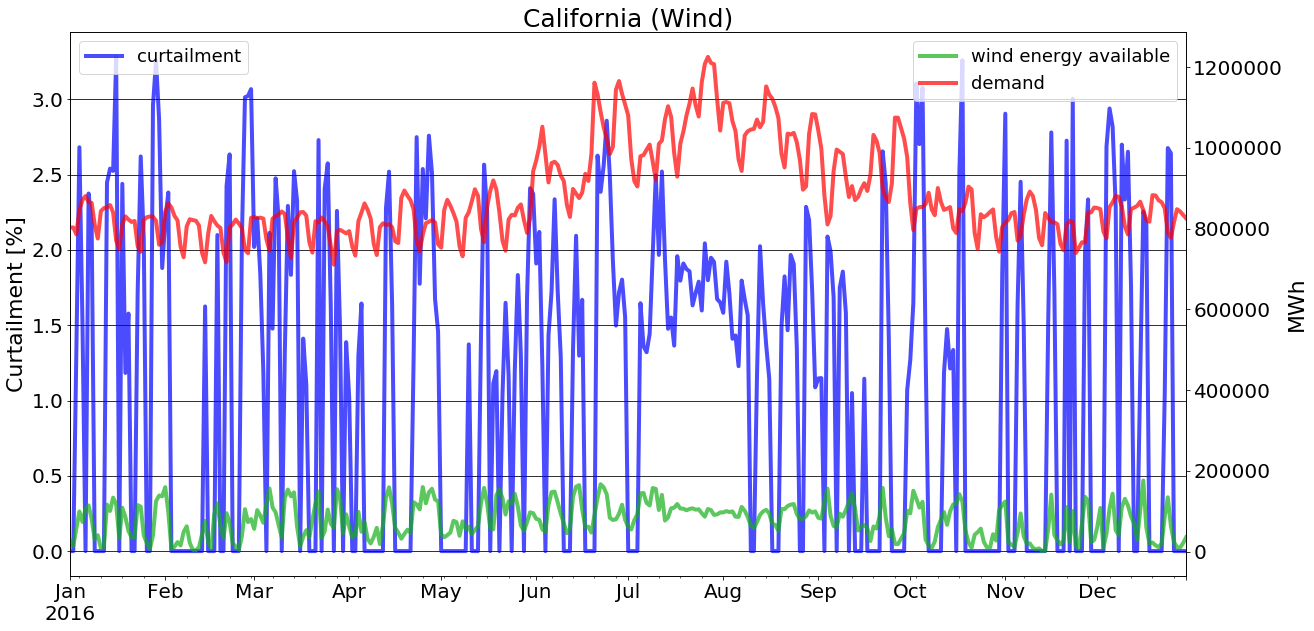

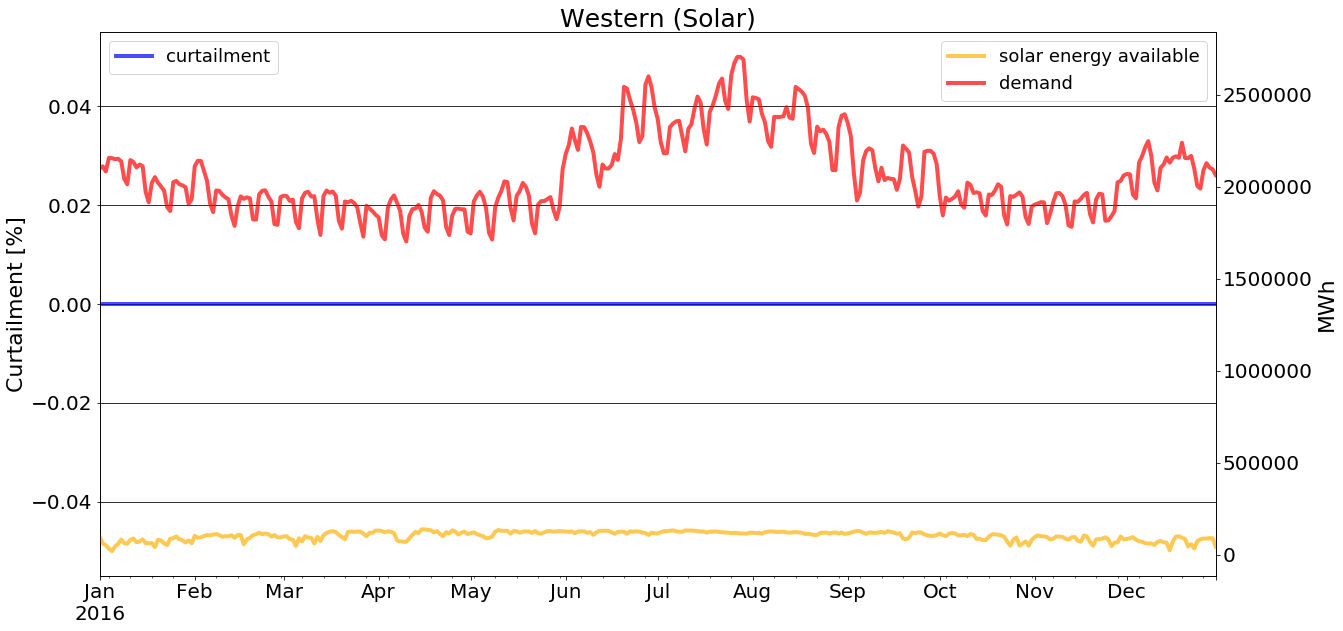

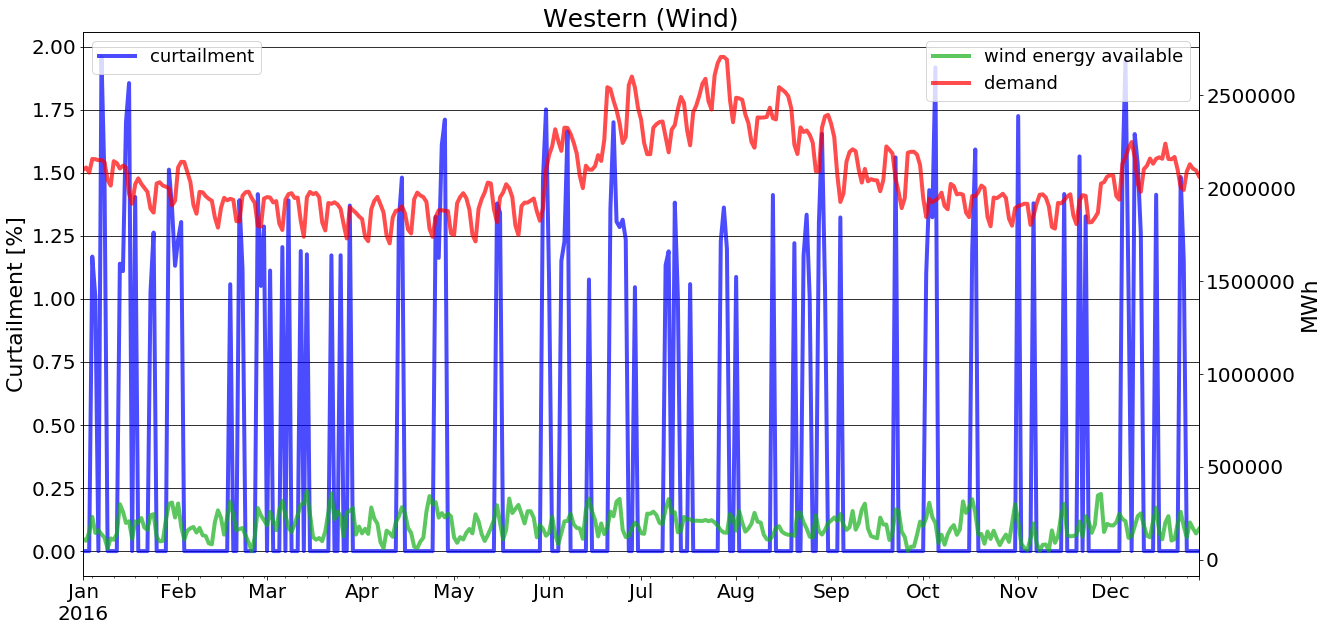

In [10]:
curtailment = apg(s2020,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [11]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.0 %
Curtailment California/wind: 1.6 %
Curtailment Western/solar: 0.0 %
Curtailment Western/wind: 0.7 %


## Congestion 2020
<a id="congestion2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 1.52 for solar power output in CA and 1.48 for wind power output in CA  
Capacity of congested transmission lines in California: x2

In [12]:
s2020CaCong = Scenario('ca2020FixCaCong')

SCENARIO: ca2045 | ca2020FixCaCong

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="congestion2020_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


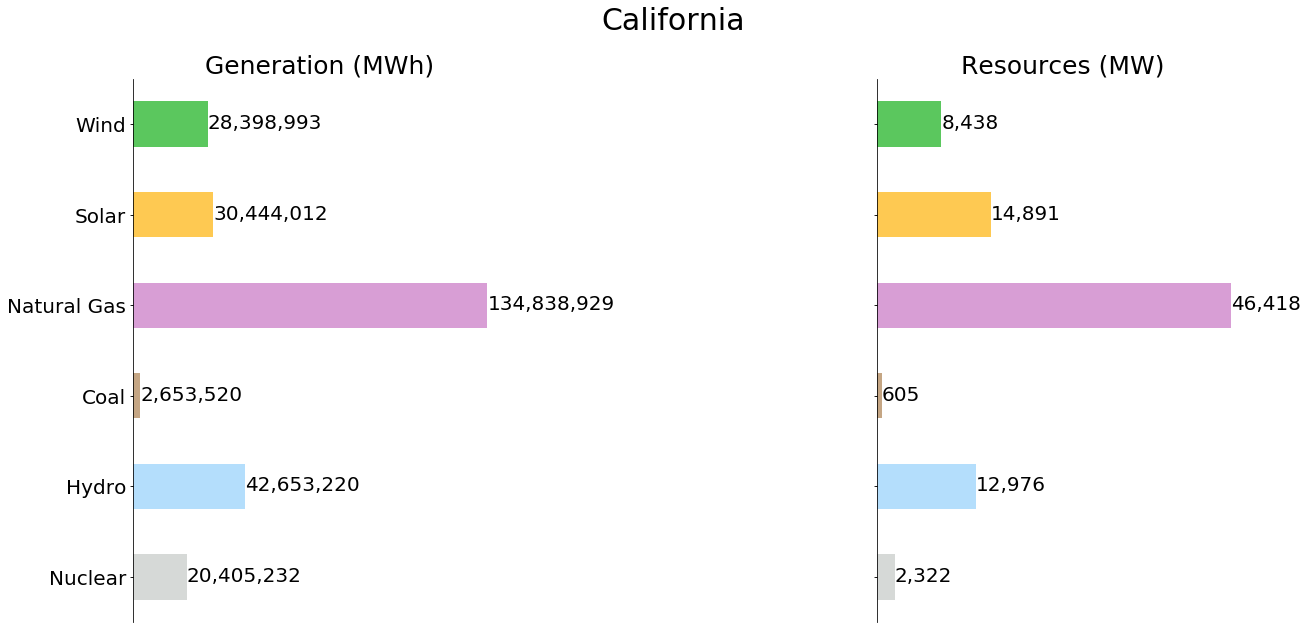

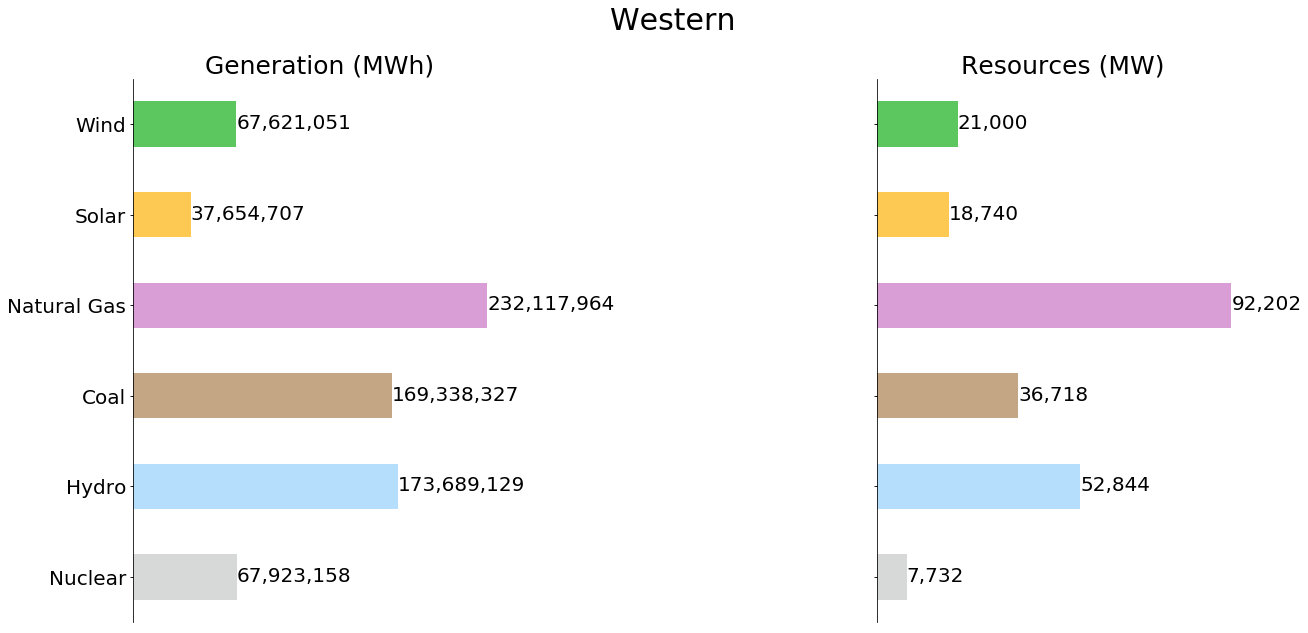

Total Generation in Western Interconnection: 748344338 MWh
Total Capacity in Western Interconnection: 229240 MW


In [13]:
chart = apg(s2020CaCong,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="congestion2020_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


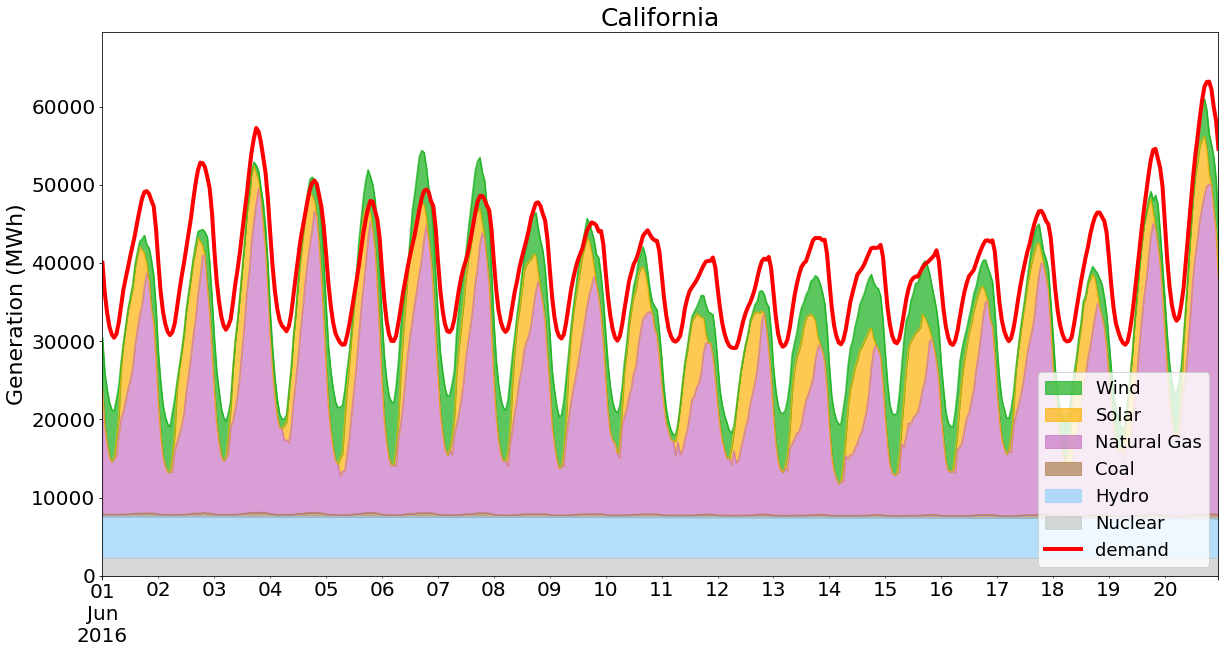

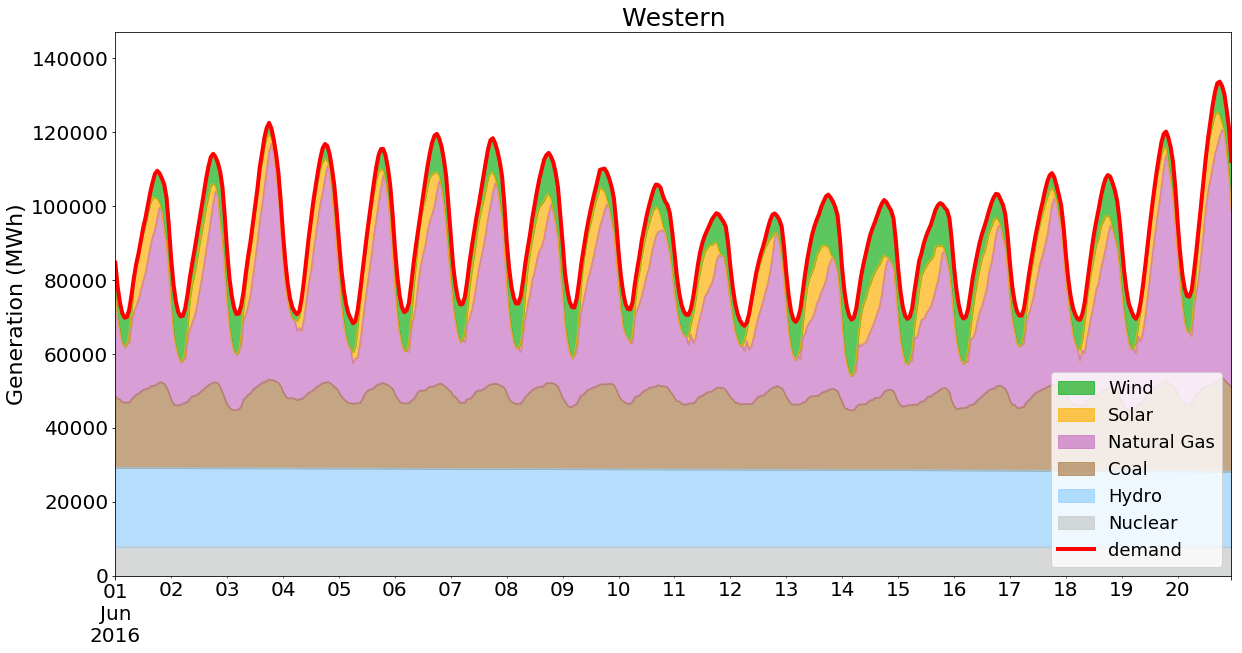

Generation in the Western interconnection in MWh:
88388034.3513776


In [14]:
stack = apg(s2020CaCong,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="congestion2020_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


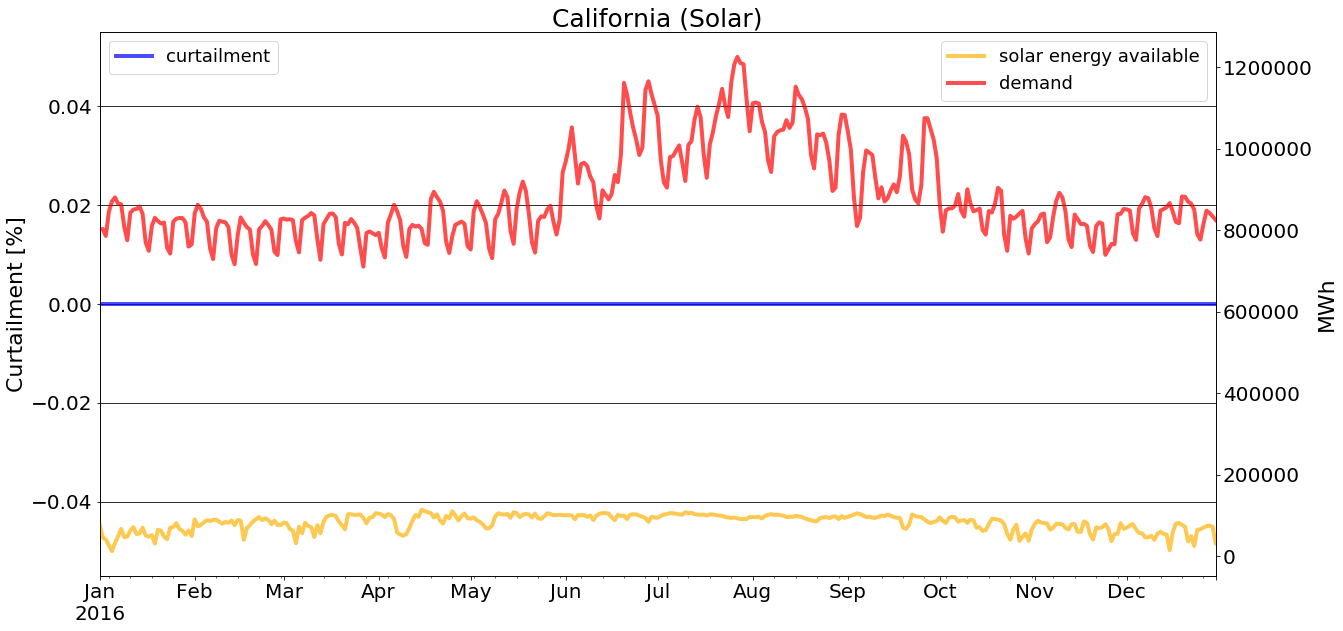

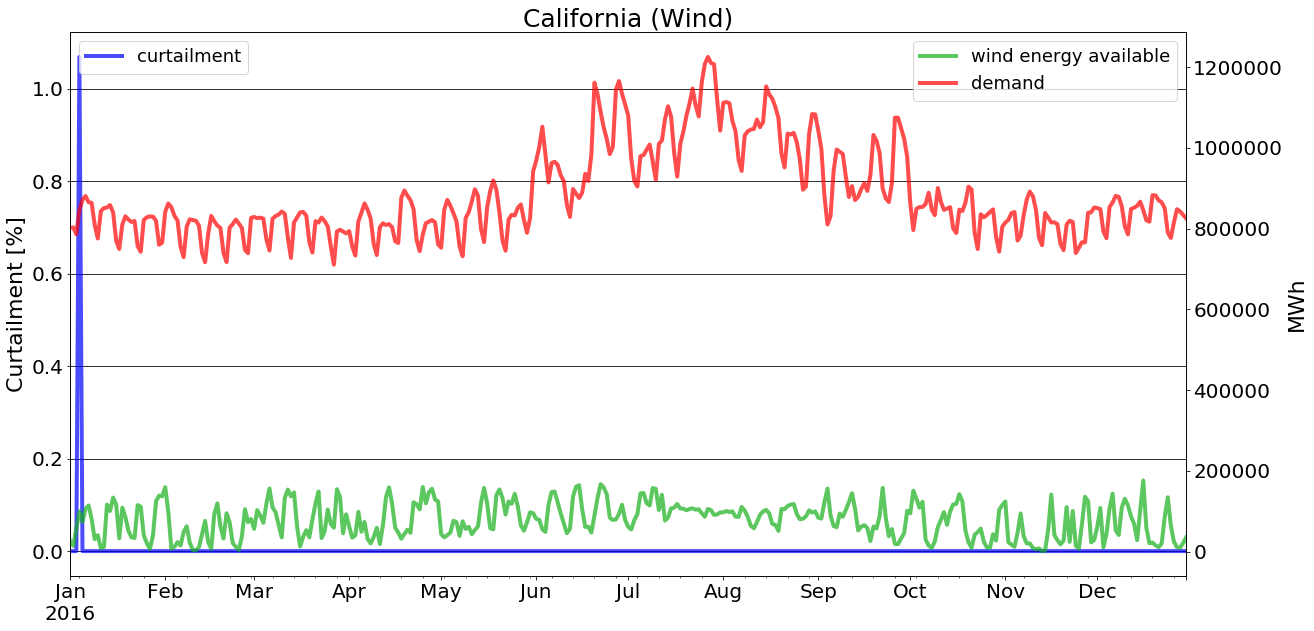

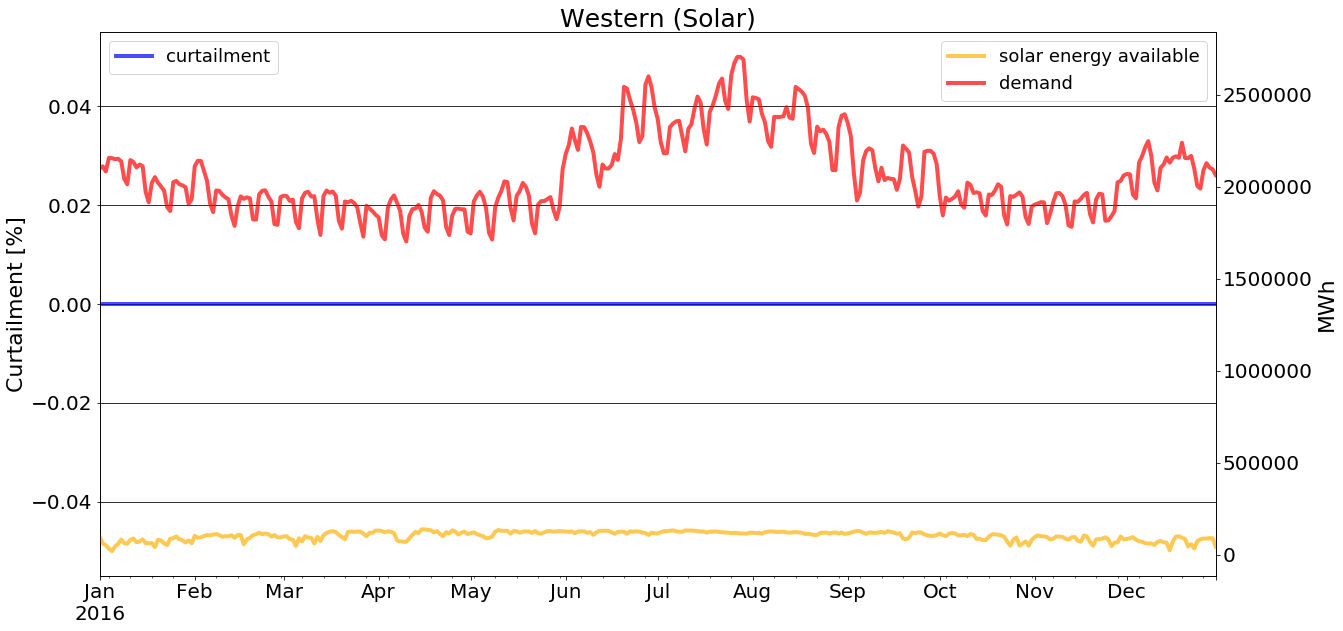

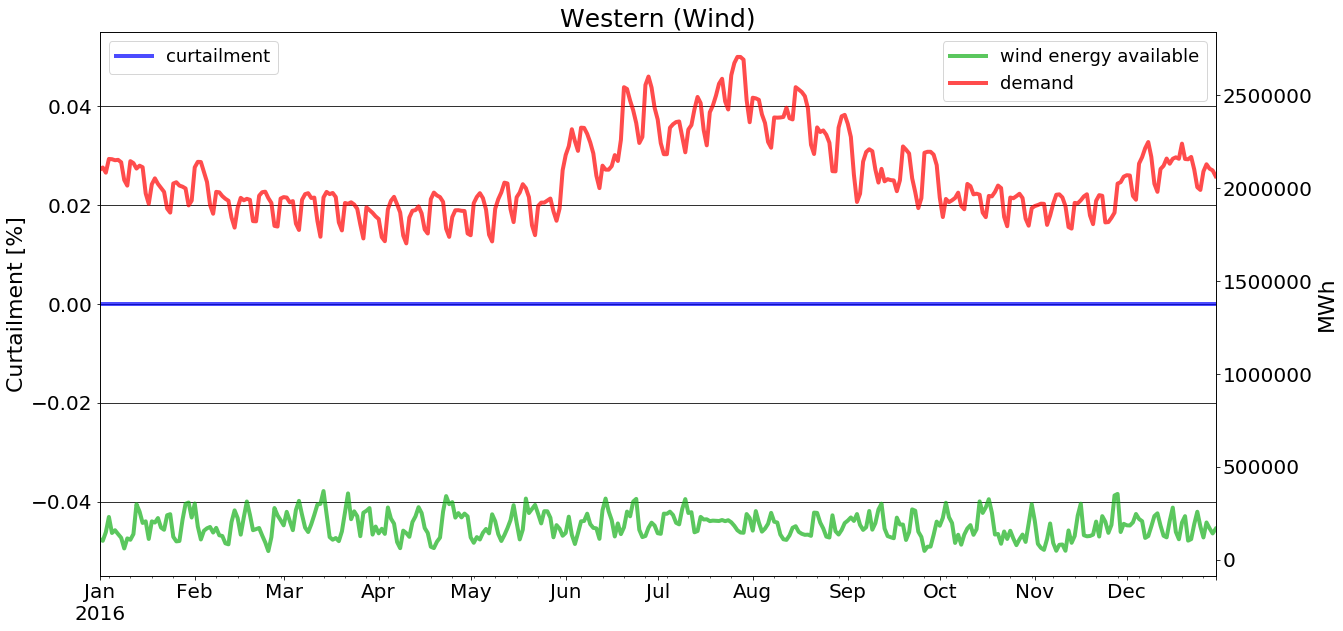

In [15]:
curtailment = apg(s2020CaCong,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [16]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.0 %
Curtailment California/wind: 0.0 %
Curtailment Western/solar: 0.0 %
Curtailment Western/wind: 0.1 %


## California 2030
<a id="ca2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.3 for solar and wind power output for whole western interconnect.

In [17]:
s2030 = Scenario('ca2030')

SCENARIO: ca2045 | ca2030

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="ca2030_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


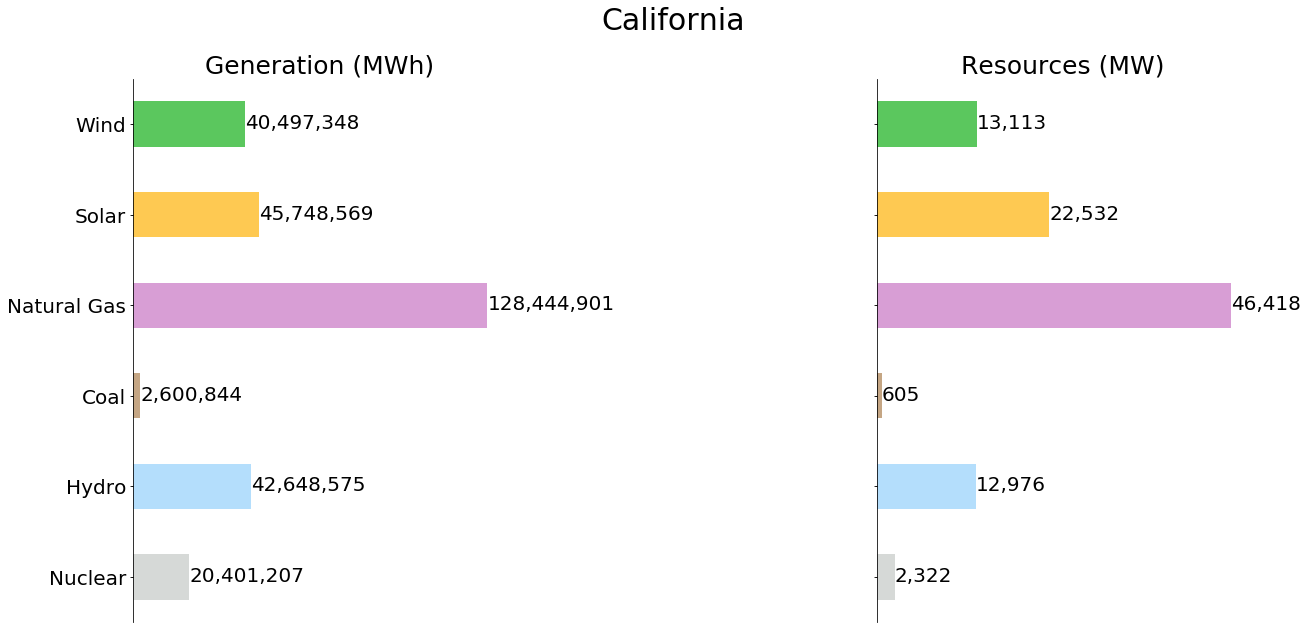

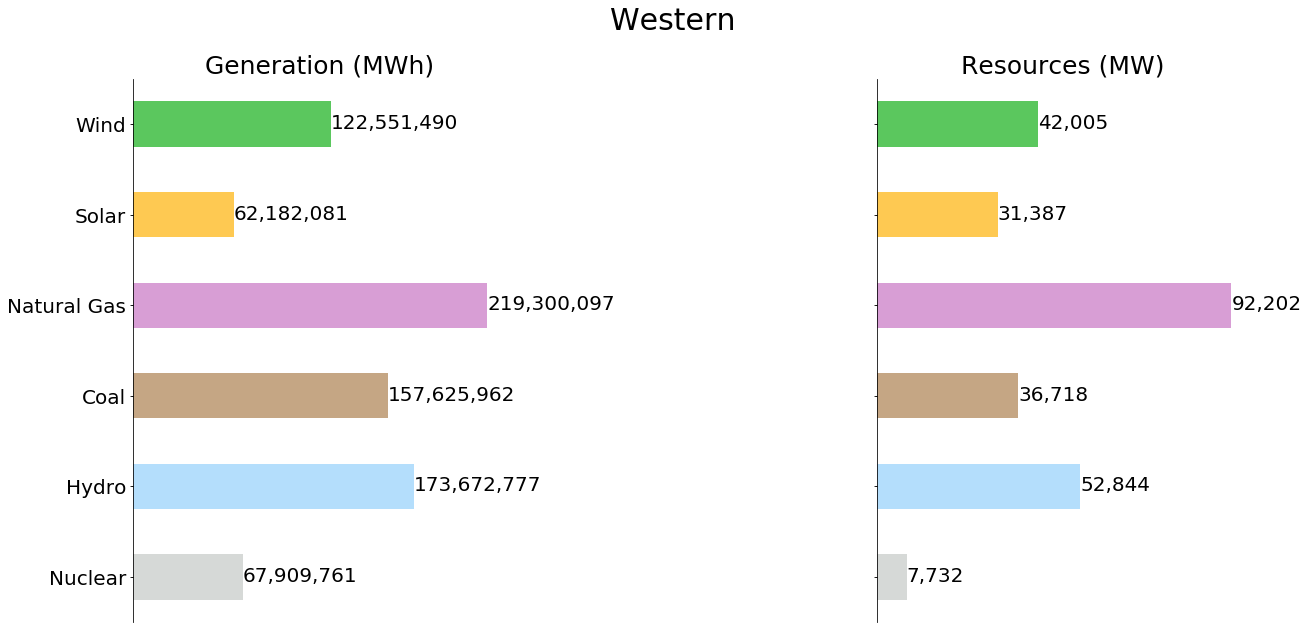

Total Generation in Western Interconnection: 803242171 MWh
Total Capacity in Western Interconnection: 262892 MW


In [18]:
chart = apg(s2030 ,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="ca2030_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


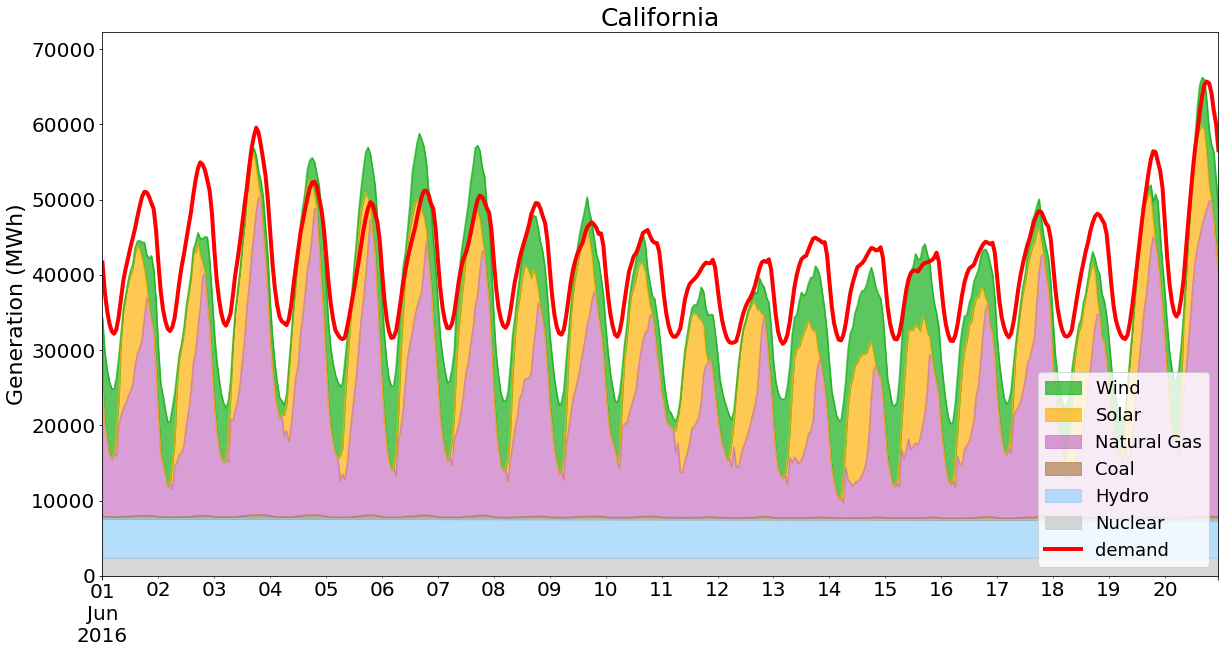

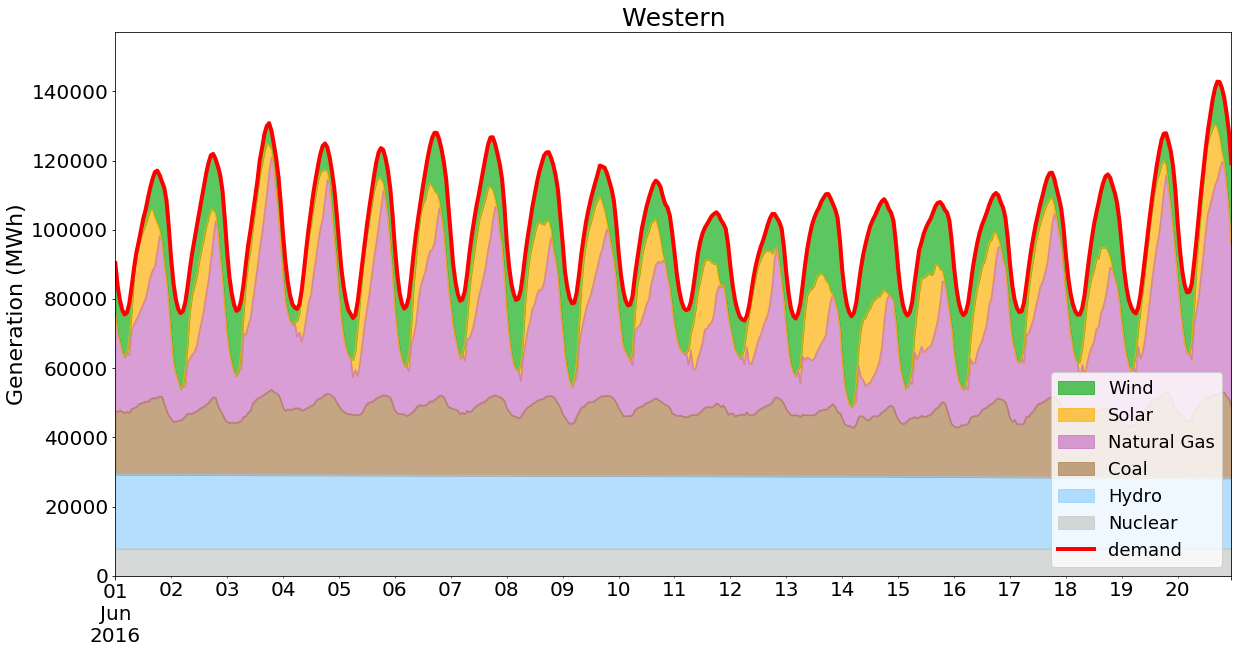

Generation in the Western interconnection in MWh:
95497191.70822236


In [19]:
stack = apg(s2030,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="ca2030_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


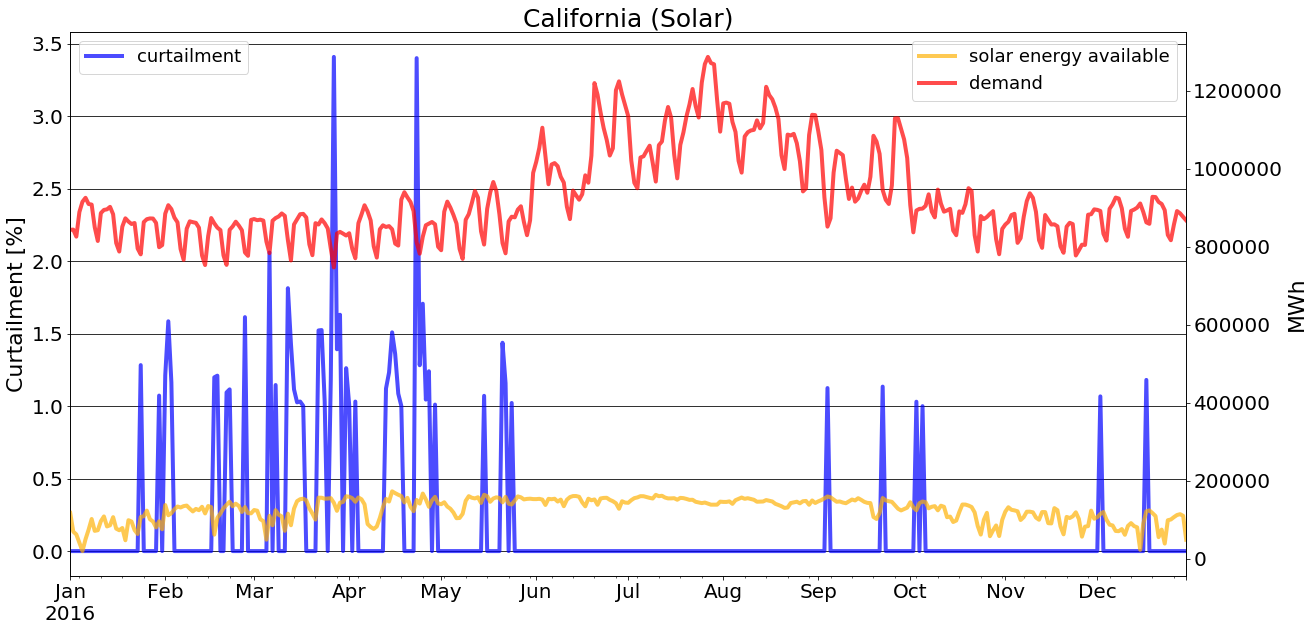

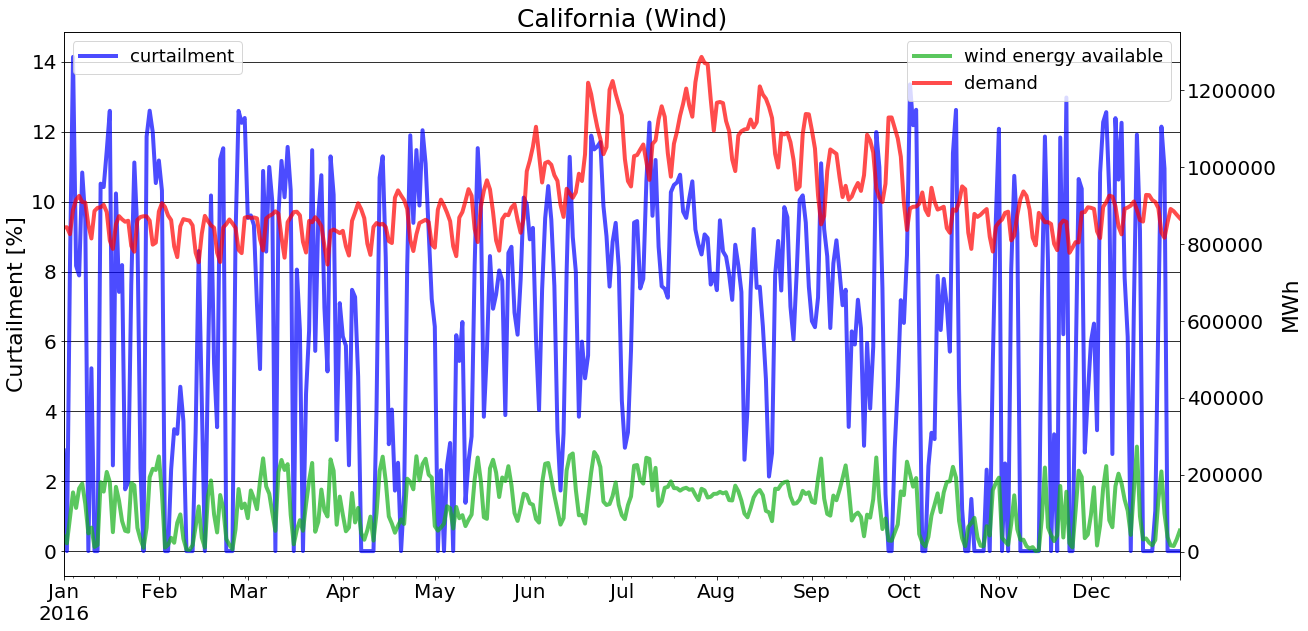

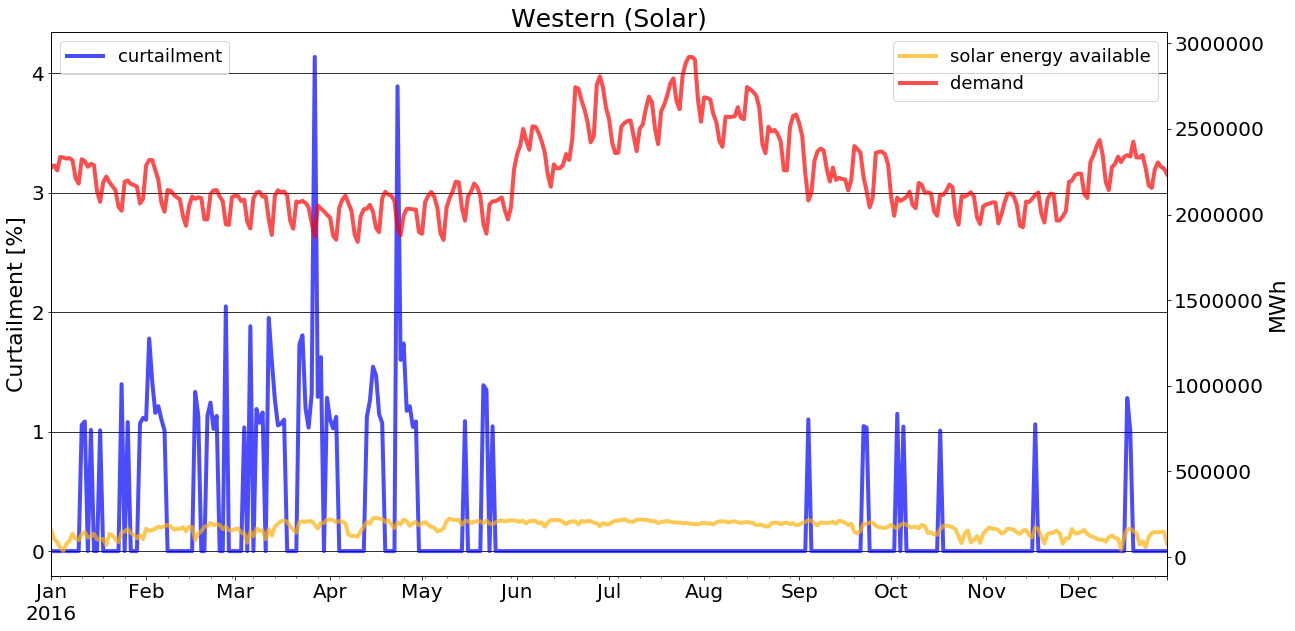

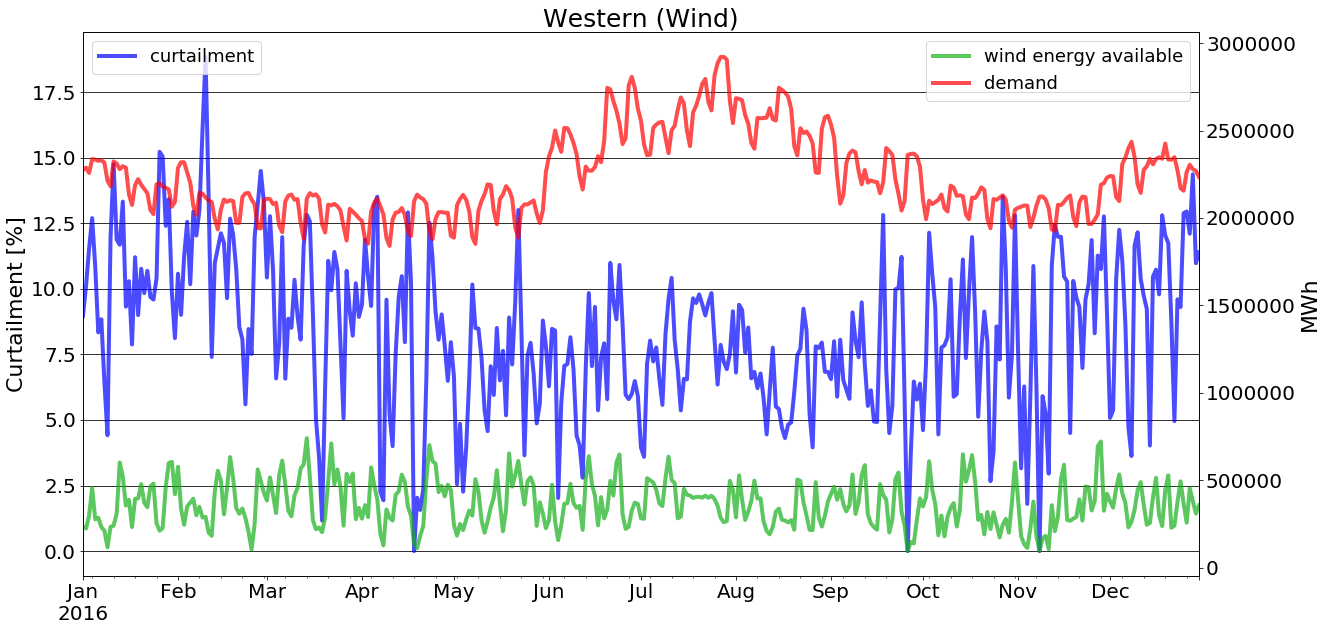

In [20]:
curtailment = apg(s2030,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [21]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.7 %
Curtailment California/wind: 8.3 %
Curtailment Western/solar: 0.8 %
Curtailment Western/wind: 8.9 %


## Congestion 2030
<a id="congestion2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.3 for solar and wind power output for whole western interconnect.  
Capacity of congested transmission lines in California: x2

In [22]:
s2030CaCong = Scenario('ca2030FixCaCong')

SCENARIO: ca2045 | ca2030FixCaCong

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="congestion2030_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


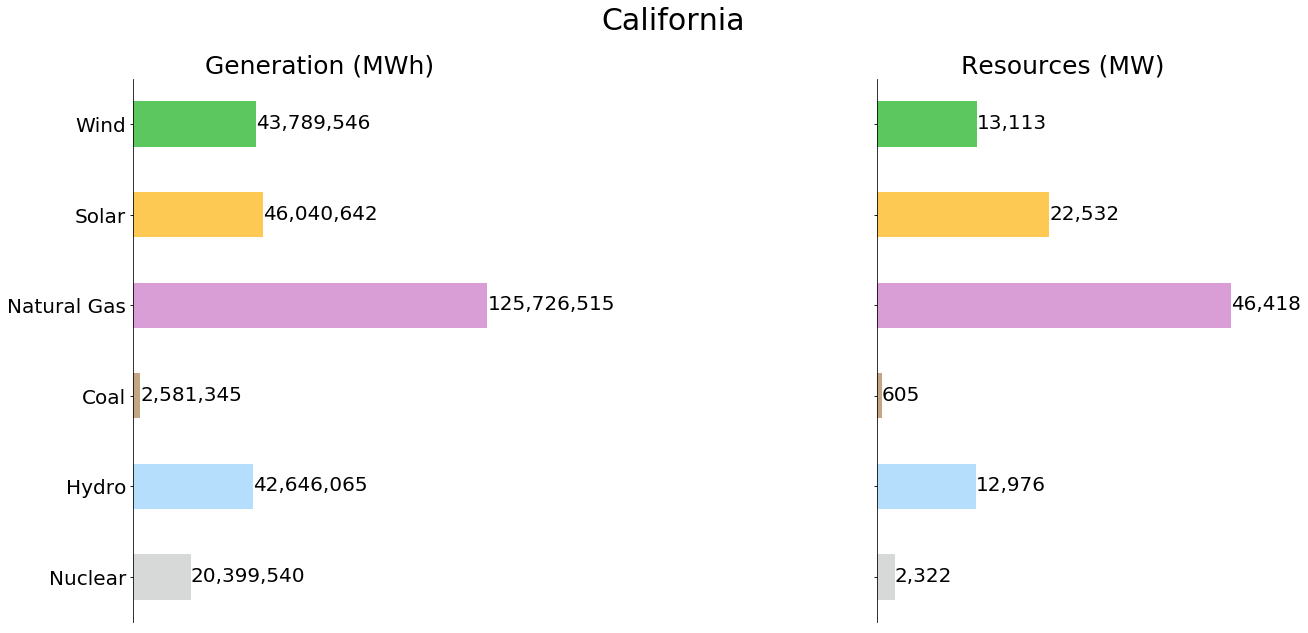

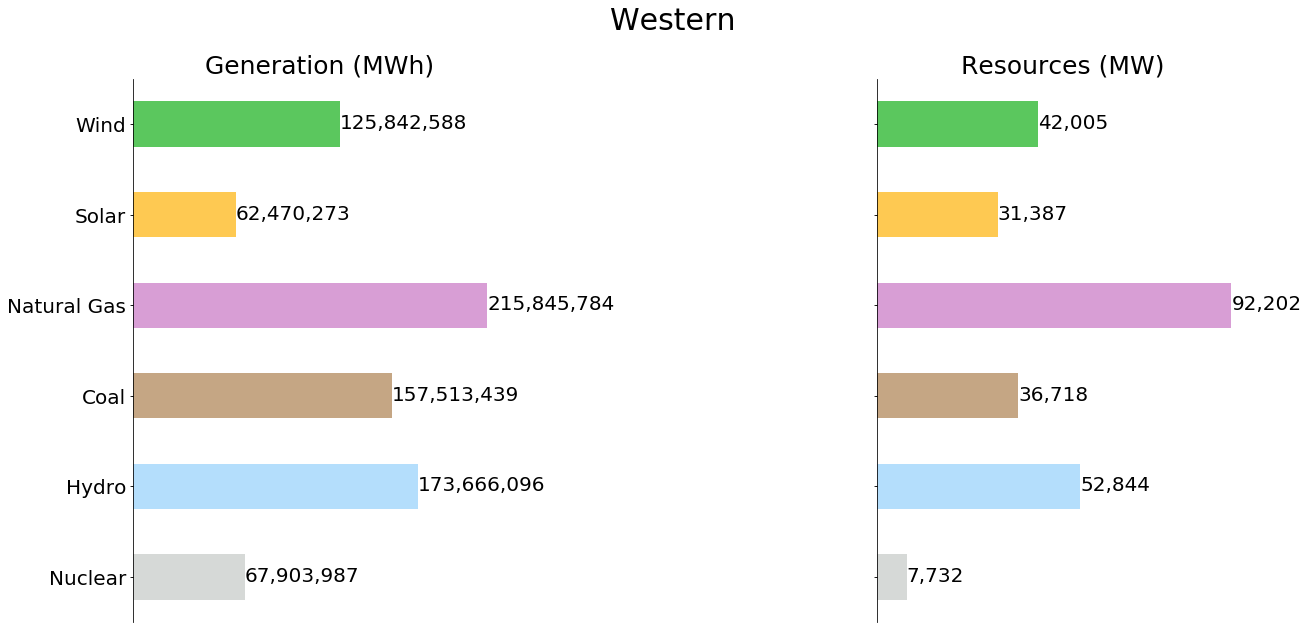

Total Generation in Western Interconnection: 803242171 MWh
Total Capacity in Western Interconnection: 262892 MW


In [23]:
chart = apg(s2030CaCong,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="congestion2030_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


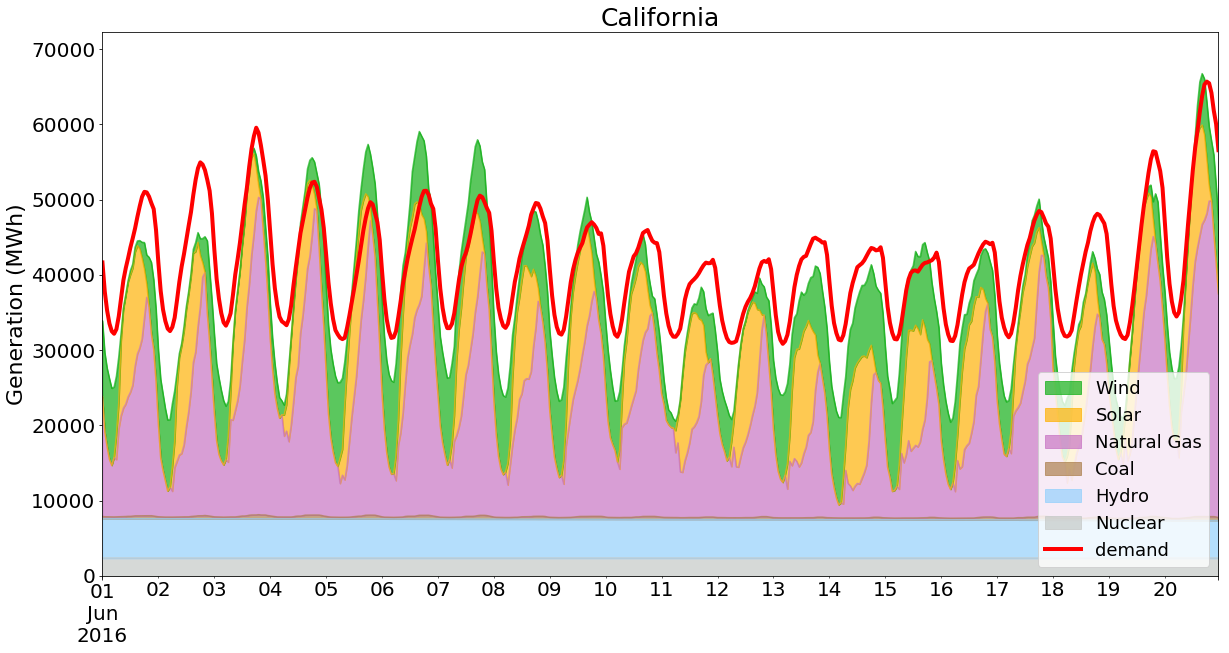

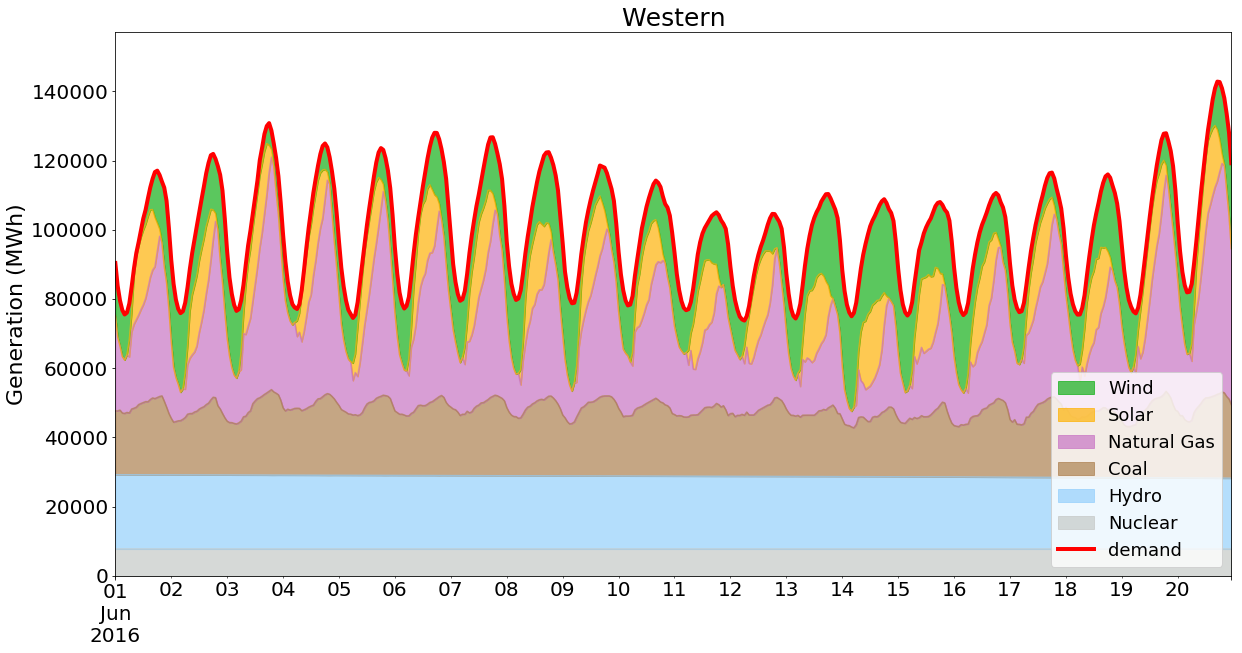

Generation in the Western interconnection in MWh:
95497191.7082454


In [24]:
stack = apg(s2030CaCong,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="congestion2030_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


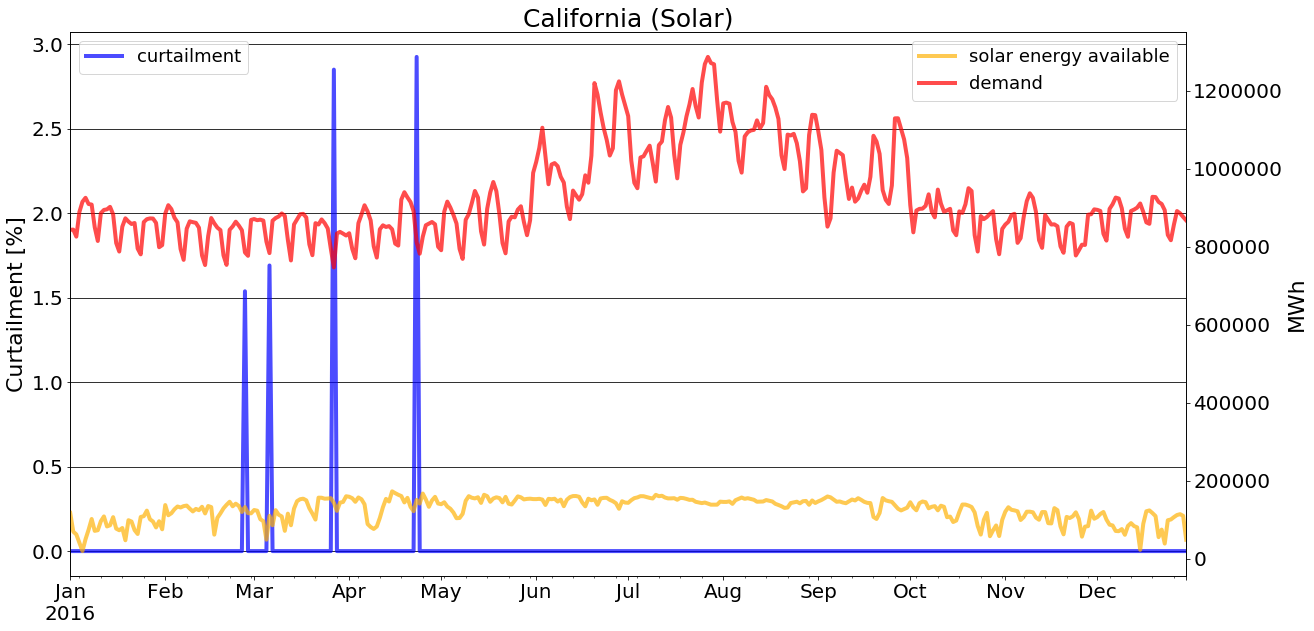

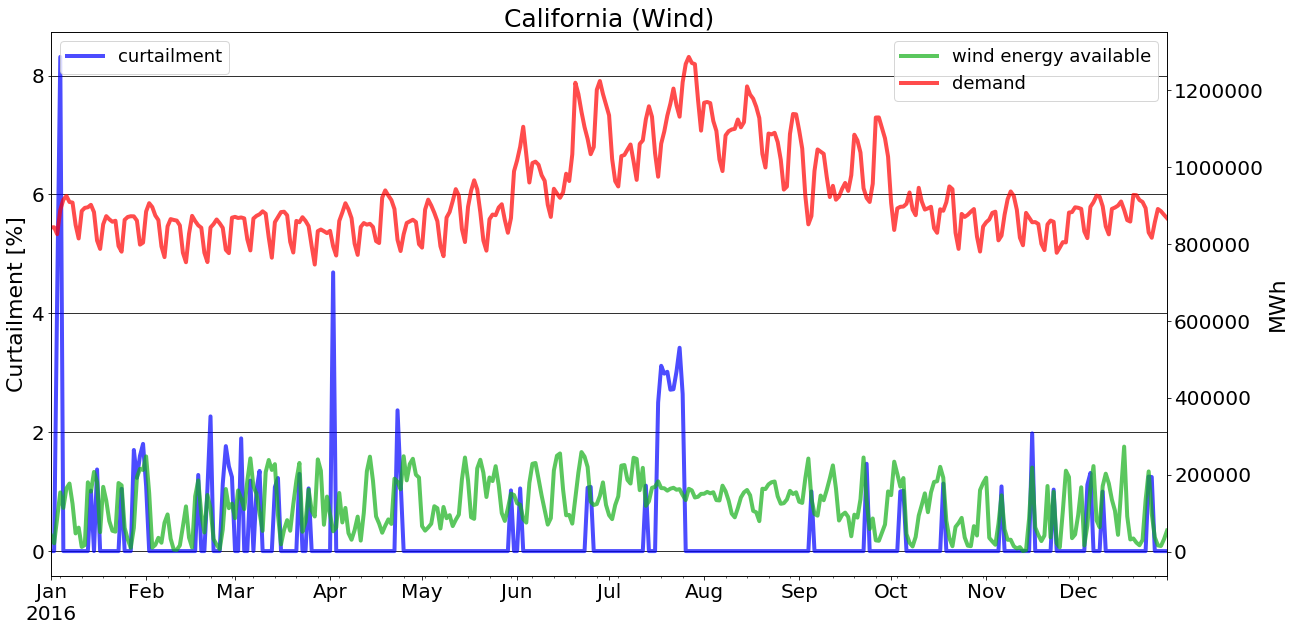

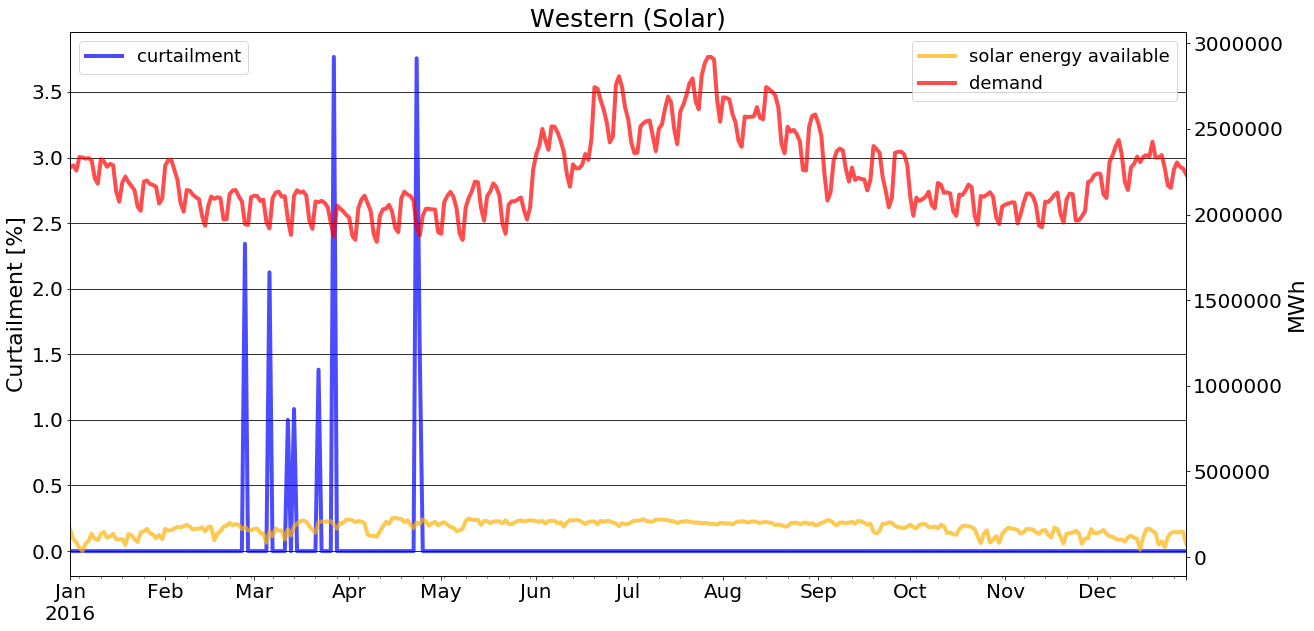

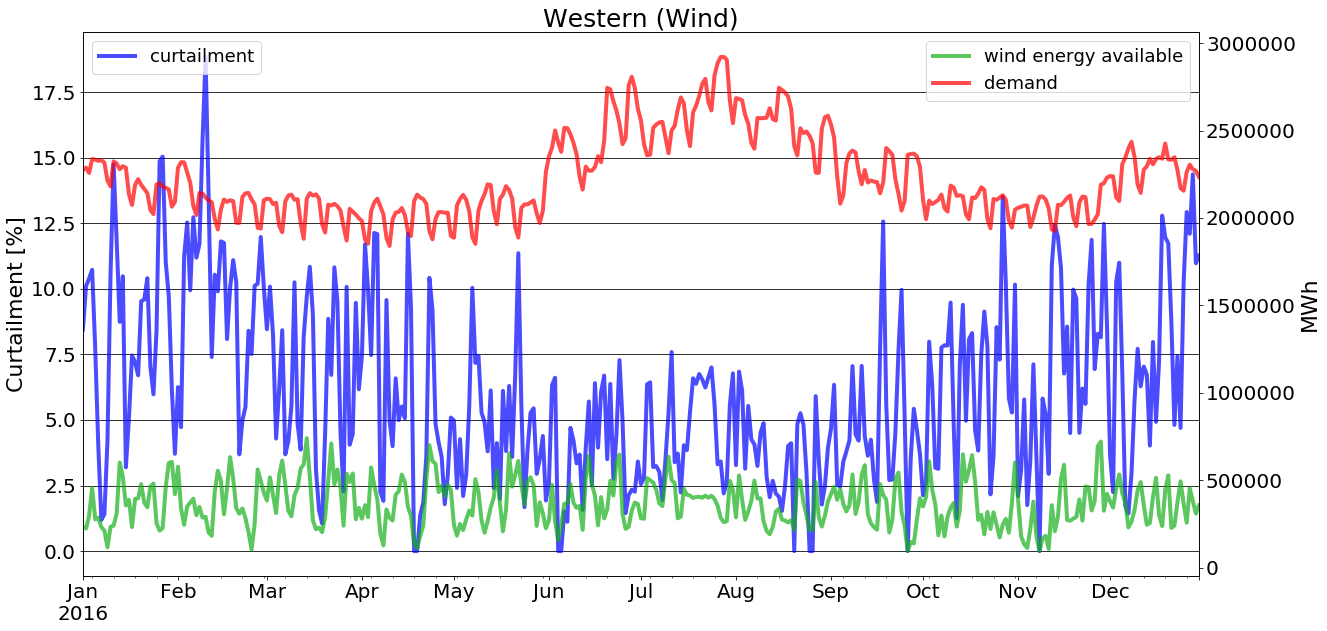

In [25]:
curtailment = apg(s2030CaCong,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [26]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.1 %
Curtailment California/wind: 0.8 %
Curtailment Western/solar: 0.3 %
Curtailment Western/wind: 6.4 %


## West 2020
<a id="west2020"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 2.25 for solar and wind power output for whole western interconnect.

In [27]:
s2020West = Scenario('ca2020WestTarget')

SCENARIO: ca2045 | ca2020WestTarget

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="west2020_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


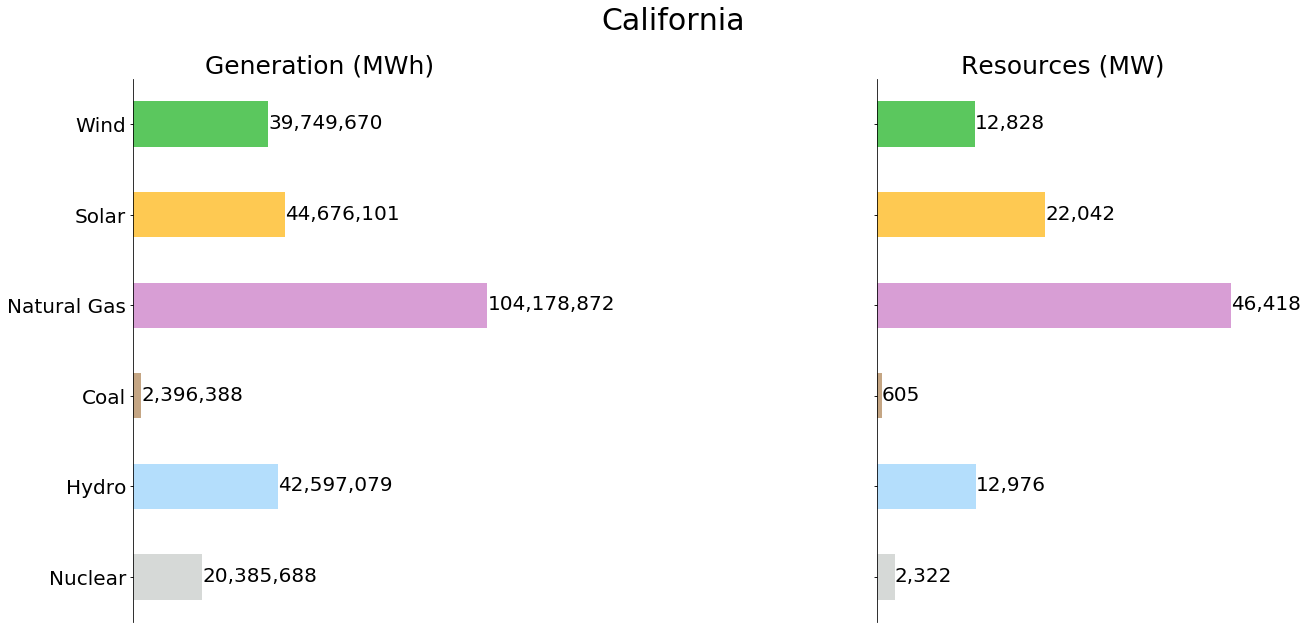

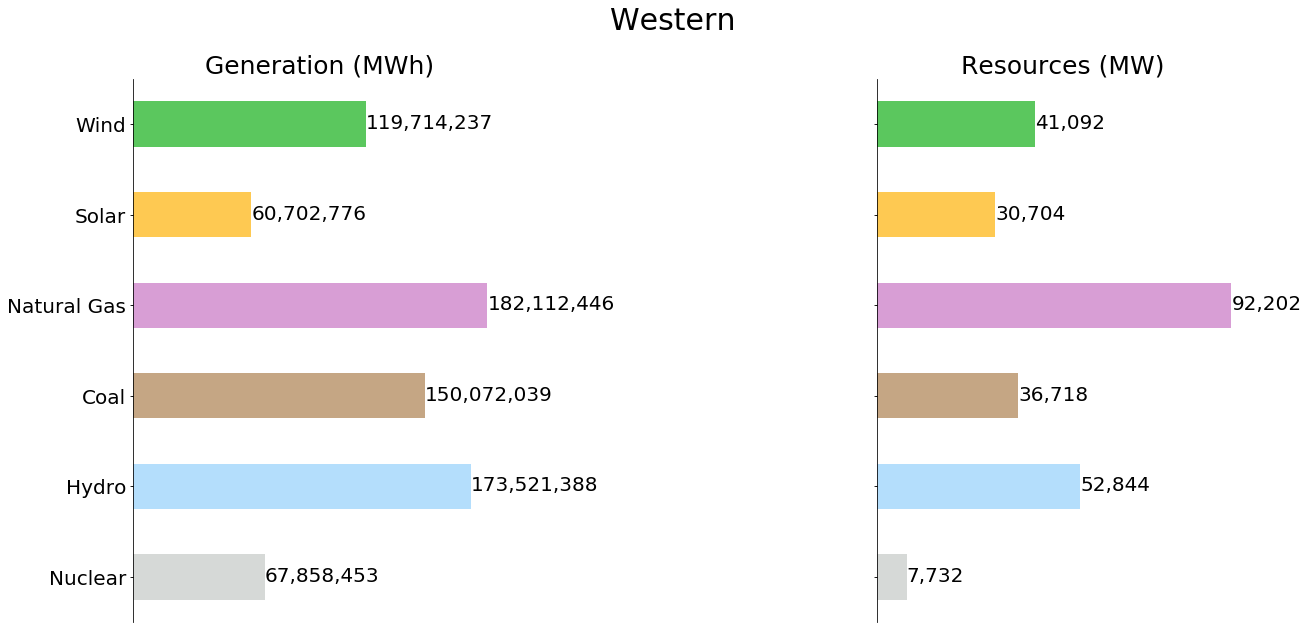

Total Generation in Western Interconnection: 753981342 MWh
Total Capacity in Western Interconnection: 261297 MW


In [28]:
chart = apg(s2020West,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="west2020_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


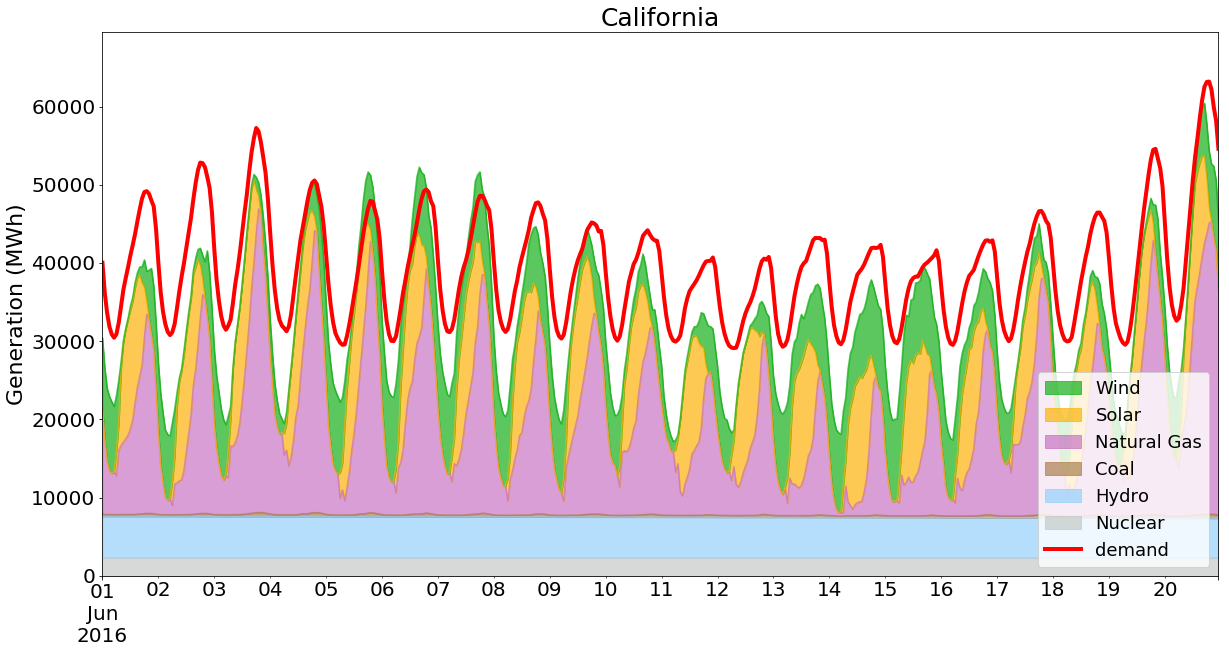

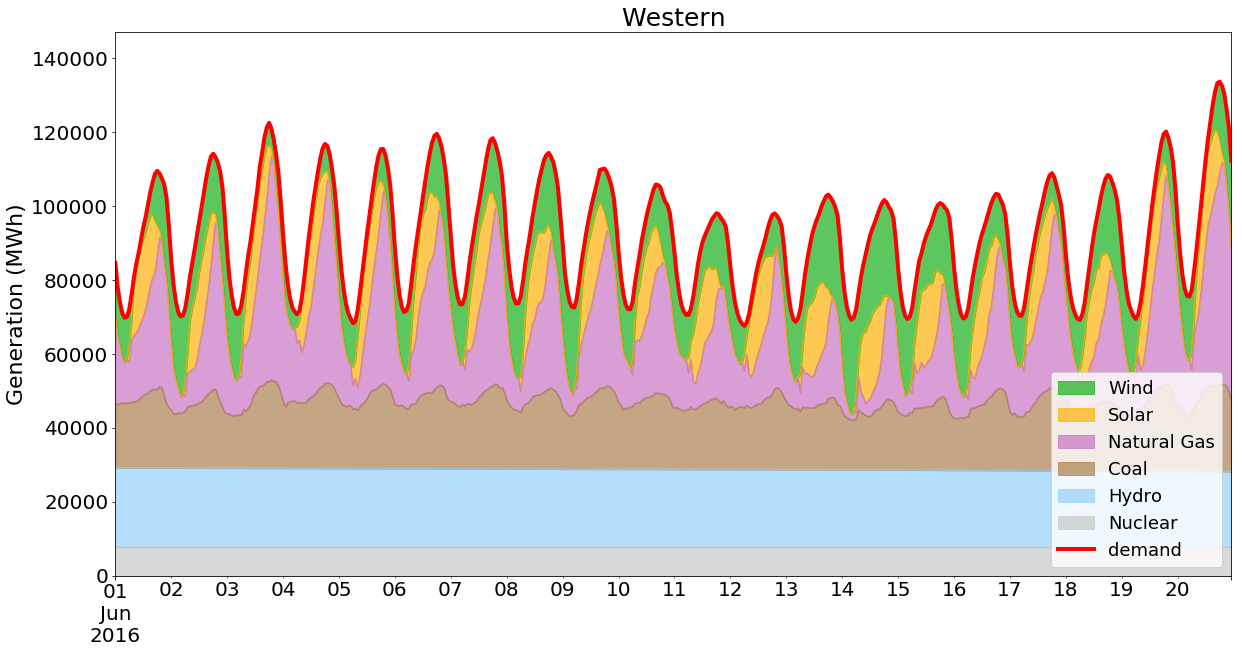

Generation in the Western interconnection in MWh:
88388034.35132152


In [29]:
stack = apg(s2020West,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="west2020_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


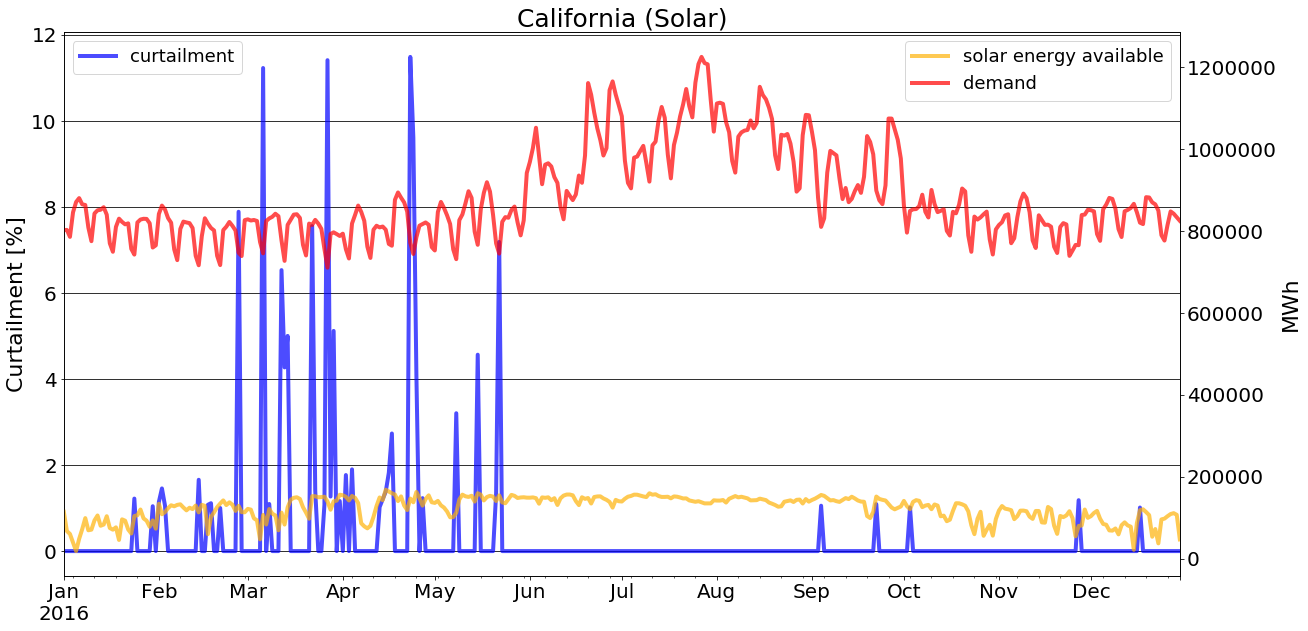

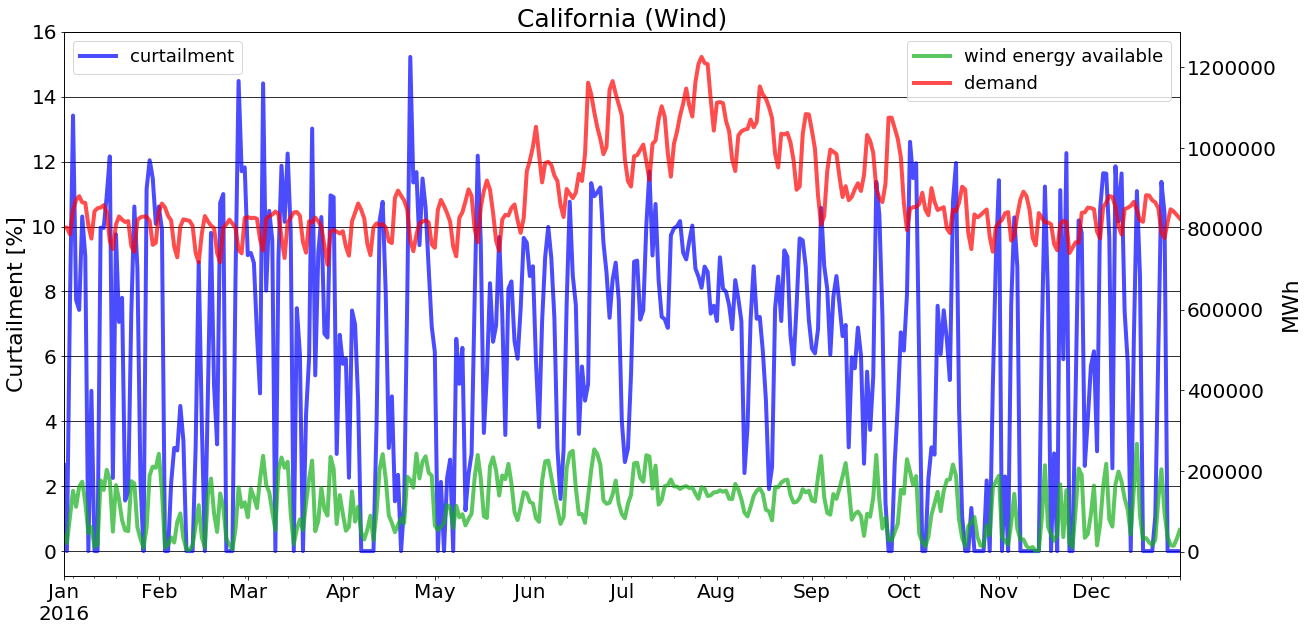

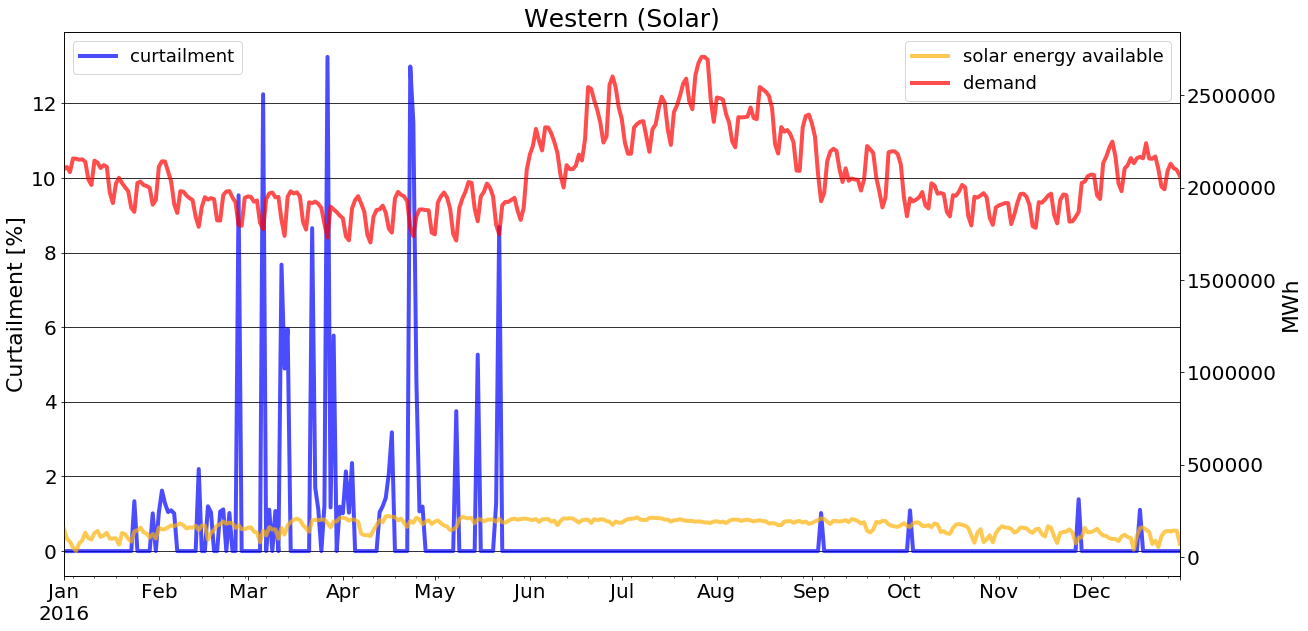

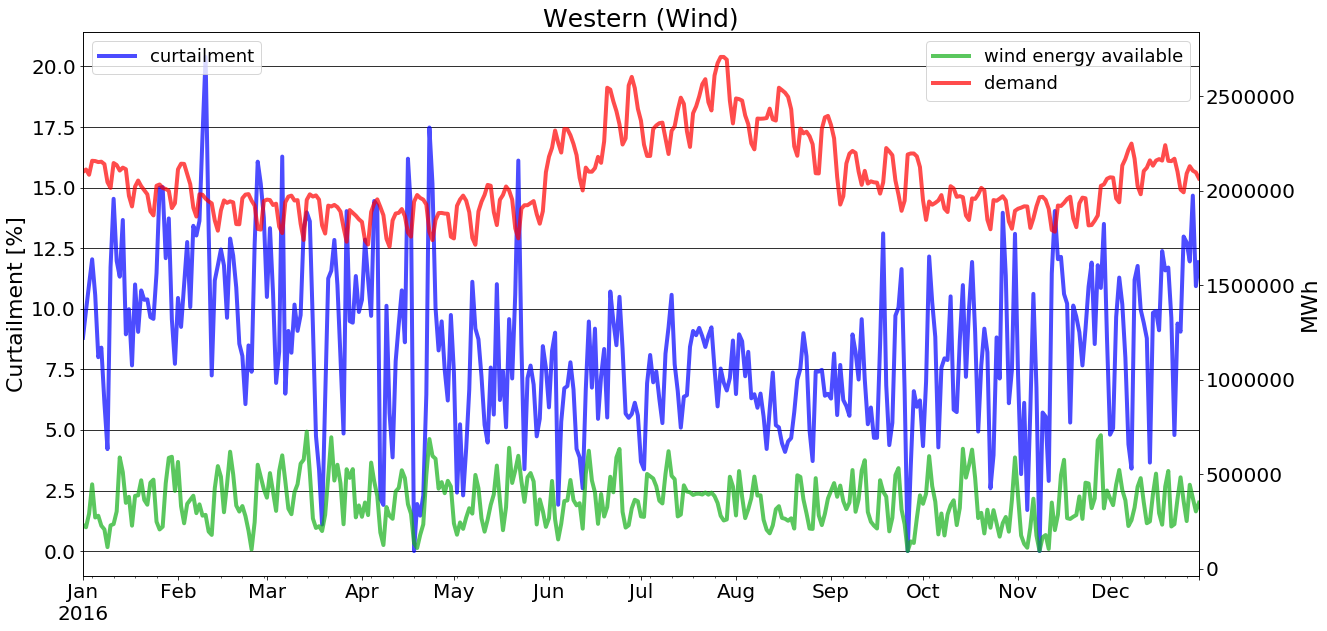

In [30]:
curtailment = apg(s2020West,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [31]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 0.9 %
Curtailment California/wind: 7.9 %
Curtailment Western/solar: 1.0 %
Curtailment Western/wind: 9.0 %


## West 2030
<a id="west2030"></a>
Multiperiod  
Solar power: SAM  
demand v3  
multiplier: 5 for solar and wind power output for whole western interconnect.

In [32]:
s2030West = Scenario('ca2030WestTarget')

SCENARIO: ca2045 | ca2030WestTarget

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


### 1. Charts
<a id="west2030_chart"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
Set UTC for all zones


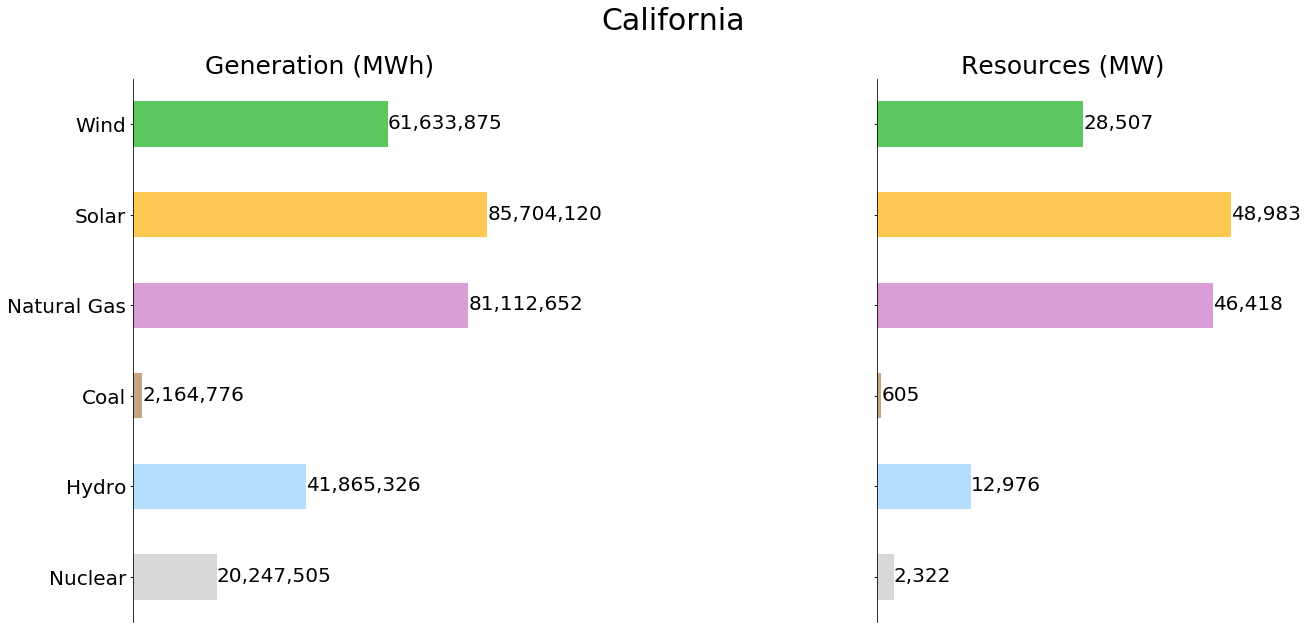

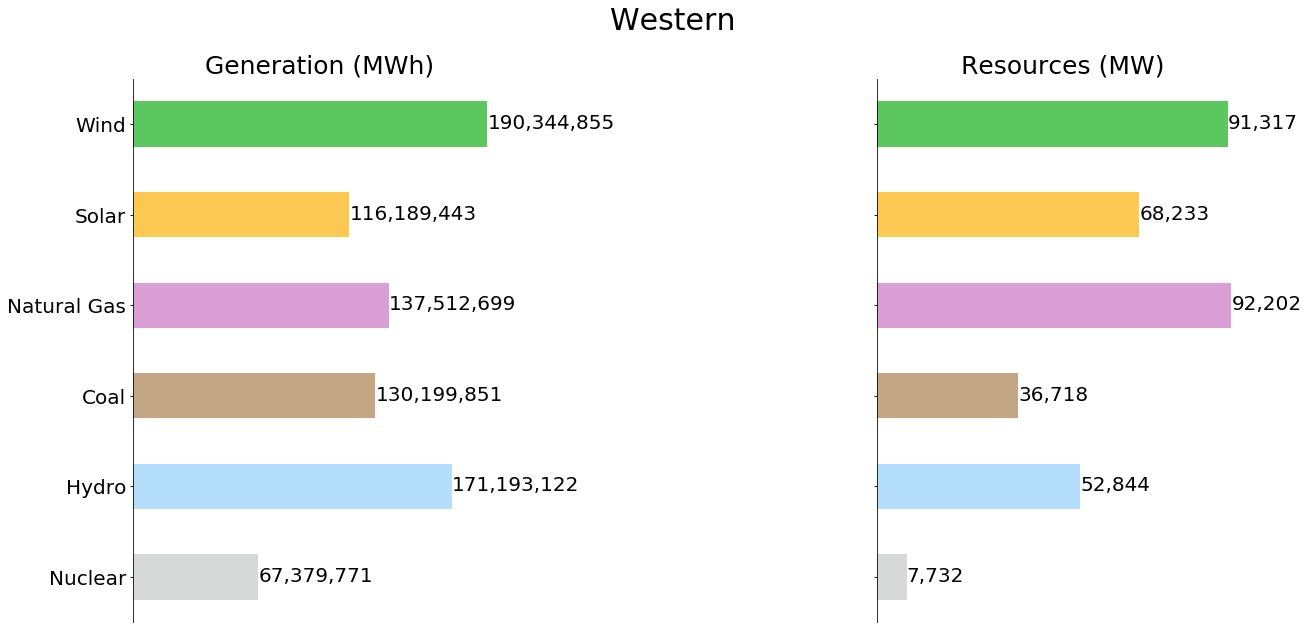

Total Generation in Western Interconnection: 812819743 MWh
Total Capacity in Western Interconnection: 349049 MW


In [33]:
chart = apg(s2030West,
            ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
            ['California', 'Western'],
            ['nuclear', 'hydro', 'coal', 'ng', 'solar', 'wind'],
            'chart', normalize=False)
chart.get_plot(save=False)
data_chart = chart.get_data()
print("Total Generation in Western Interconnection: %d MWh" % round(data_chart['Western']['Generation'].sum().sum()))
print("Total Capacity in Western Interconnection: %d MW" % round(data_chart['Western']['Capacity'].sum()))

### 2. Stacked Plots
<a id="west2030_stack"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


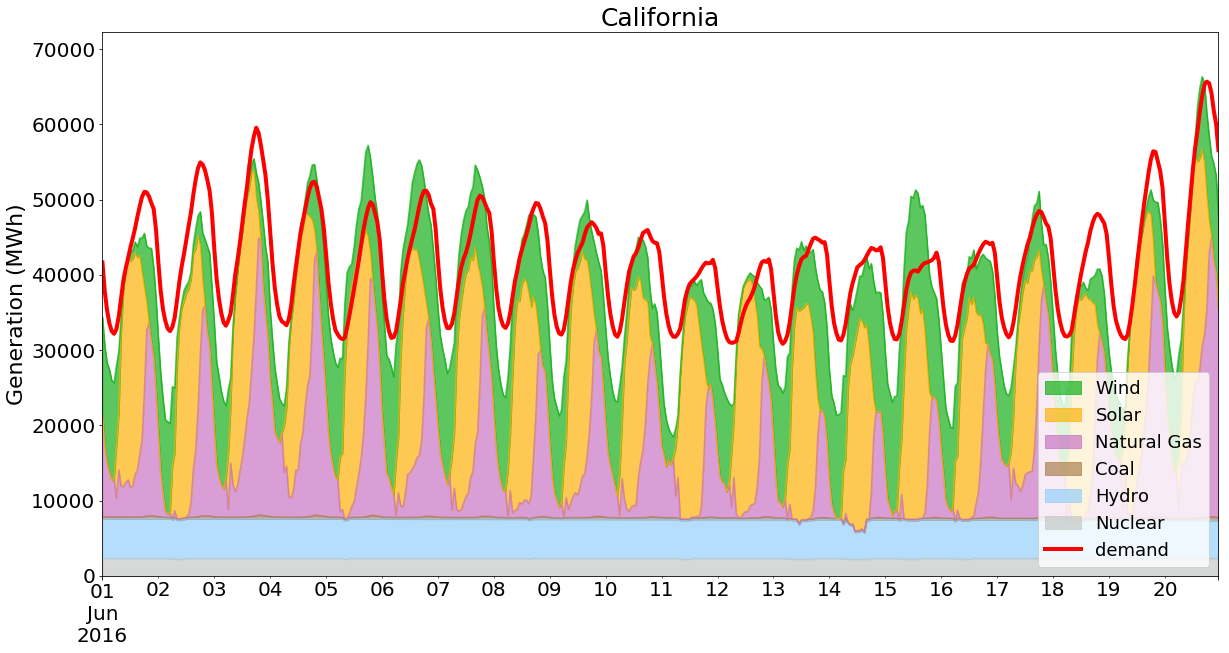

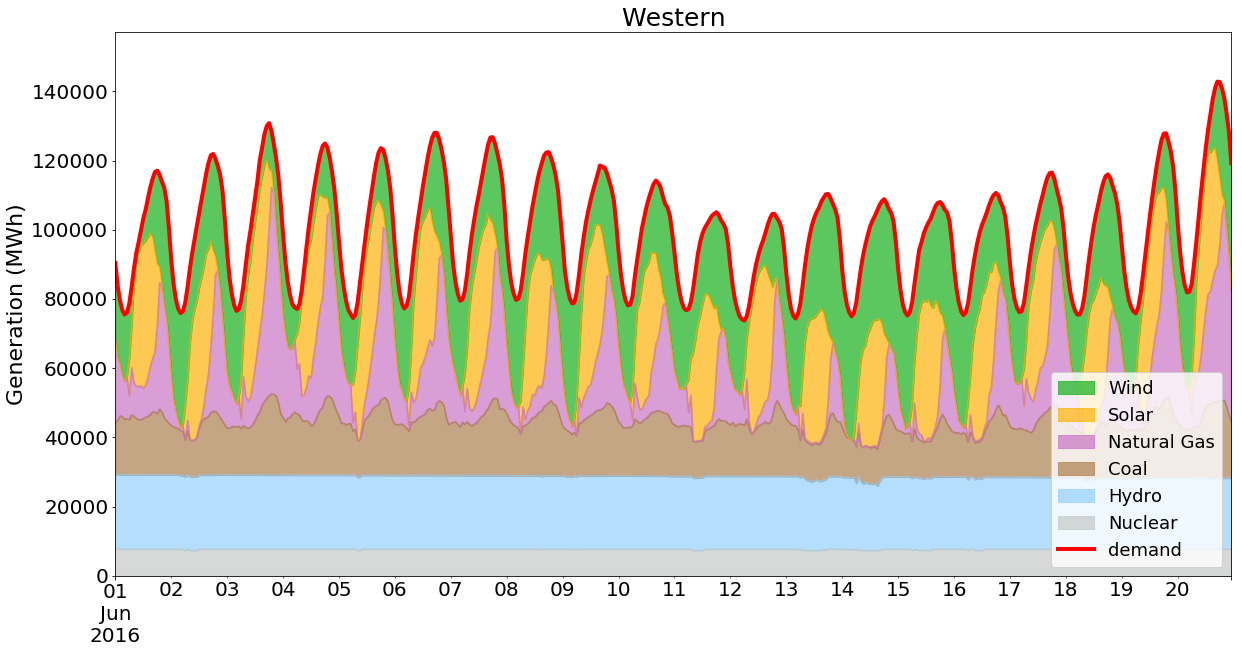

Generation in the Western interconnection in MWh:
95497191.71122605


In [34]:
stack = apg(s2030West,
            ('2016-06-01-00', '2016-06-20-23', 'local', 'H'),
            ['California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("Generation in the Western interconnection in MWh:")
print(data_stack['Western'].sum().sum())

### 3. Curtailment Plots
<a id="west2030_curtailment"></a>

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro


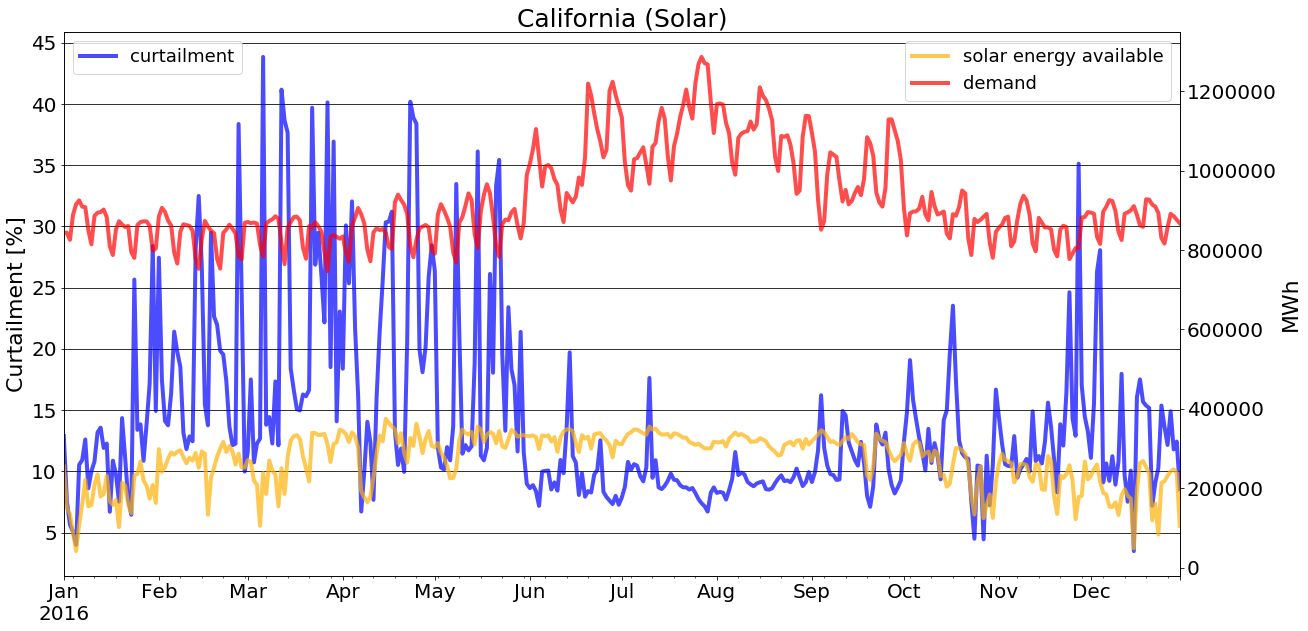

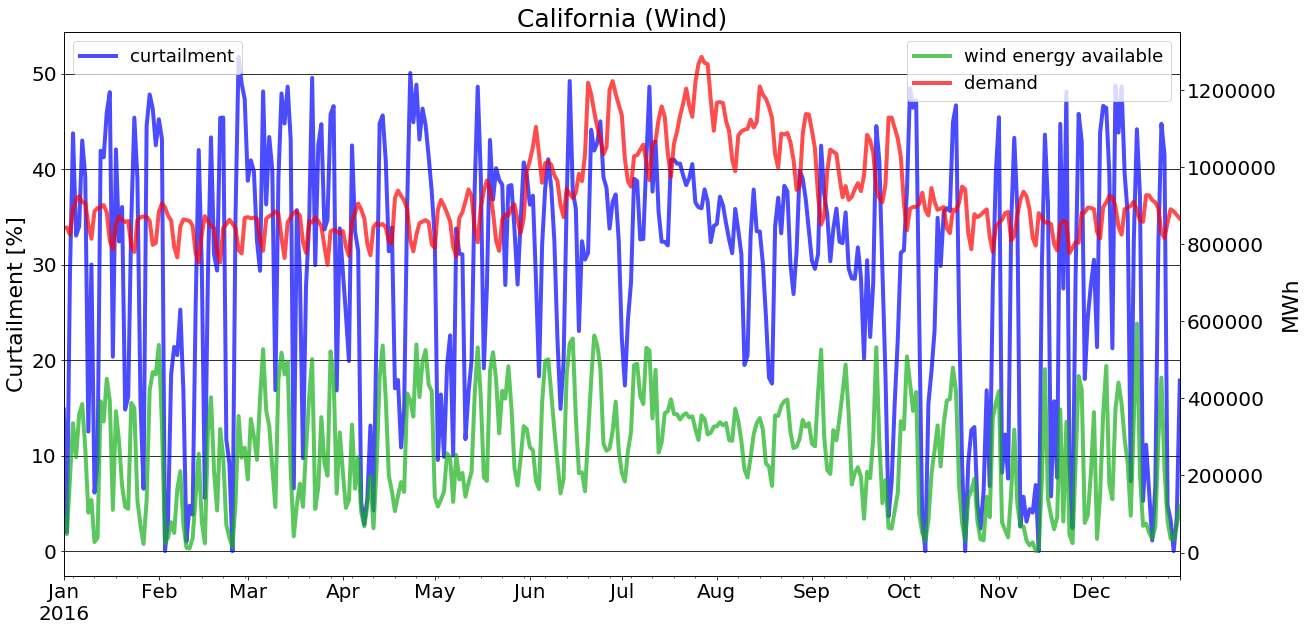

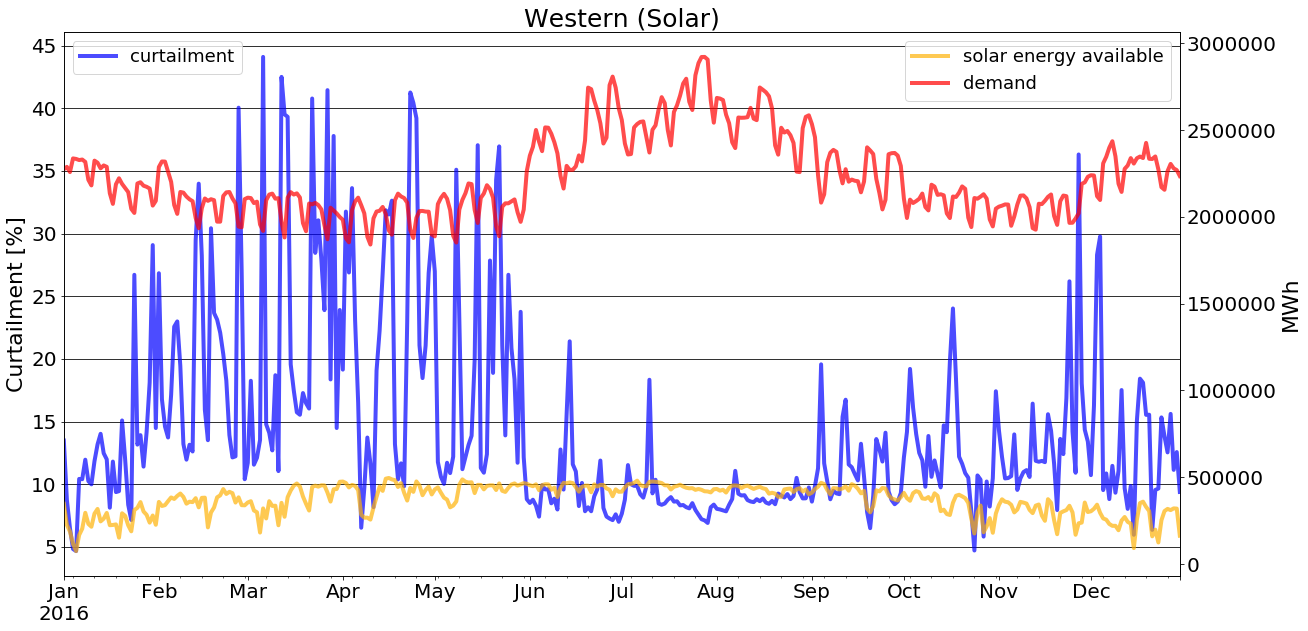

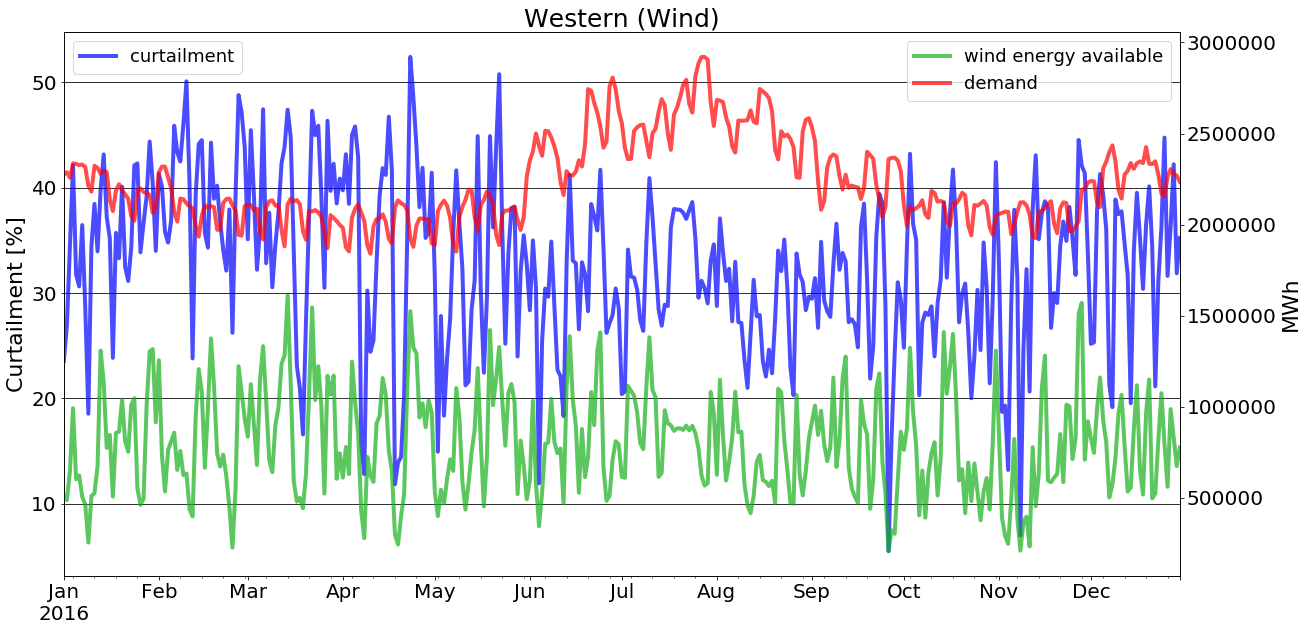

In [35]:
curtailment = apg(s2030West,
                  ('2016-01-01-00', '2016-12-31-23', 'local', 'D'),
                  ['California', 'Western'],
                  ['solar', 'wind'],
                  'curtailment', normalize=False)
curtailment.get_plot(save=False)
data_curtailment = curtailment.get_data()

In [36]:
for zone in ['California', 'Western']:
    for resource in ['solar', 'wind']:
        available = data_curtailment[zone][resource].available.sum() 
        generated = data_curtailment[zone][resource].generated.sum()
        curtailment = 100 * (available - generated) / available
        print("Curtailment %s/%s: %.1f %%" % (zone, resource, curtailment))

Curtailment California/solar: 14.4 %
Curtailment California/wind: 35.8 %
Curtailment Western/solar: 14.7 %
Curtailment Western/wind: 34.9 %
